Vehicle Sales Analytics

![Ảnh minh họa](https://images.unsplash.com/photo-1560009320-c01920eef9f8?q=80&w=1770&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D)


## 1. Về tập dữ liệu

- Nguồn: [Kaggle - Vehicle Sales Data](https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data)
- Dữ liệu này cung cấp một bộ sưu tập thông tin toàn diện liên quan đến các giao dịch bán các loại xe khác nhau. Bộ dữ liệu này bao gồm các chi tiết như năm, hãng sản xuất, mẫu xe, trang trí, loại thân xe, loại hộp số, số VIN (Số nhận dạng xe), trạng thái đăng ký, xếp hạng tình trạng, đọc đồng hồ đo đường, màu sắc ngoại thất và nội thất, thông tin người bán, Báo cáo thị trường Manheim ( MMR), giá bán và ngày bán.
- Các nội dung chính của dữ liệu:
> - **Chi tiết về xe:** Bao gồm thông tin cụ thể về từng loại xe, chẳng hạn như nhãn hiệu, mẫu xe, phiên bản và năm sản xuất.
> - **Thông tin giao dịch:** Cung cấp thông tin chi tiết về các giao dịch bán hàng, bao gồm giá bán và ngày bán.
> - **Xu hướng thị trường:** Giá trị MMR đưa ra ước tính giá trị thị trường của từng loại xe, cho phép phân tích xu hướng và biến động của thị trường.
> - **Tình trạng và quãng đường đã đi:** Chứa dữ liệu về tình trạng của xe cũng như chỉ số trên đồng hồ đo đường, cho phép phân tích xem các yếu tố này ảnh hưởng như thế nào đến giá bán.


In [ ]:
!pip install gdown
!gdown --id 1lgl4KxbdNh7Eft4FoKGT-IhJFAjrxEUQ

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1lgl4KxbdNh7Eft4FoKGT-IhJFAjrxEUQ
To: /content/car_prices.csv
100% 88.0M/88.0M [00:01<00:00, 51.7MB/s]


## 2. Mục tiêu 

- **Phân tích thị trường:** sử dụng tập dữ liệu này để nghiên cứu các xu hướng trên thị trường ô tô, bao gồm cả sự biến động về giá dựa trên các yếu tố như tình trạng xe và quãng đường đã đi.
- **Học máy:** xây dựng một mô hình dự đoán chính xác giá bán của một chiếc xe dựa trên một tập hợp các đặc điểm ảnh hưởng.


## 3. Phân tích dữ liệu

### Import thư viện

In [ ]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers

import statsmodels.api as sm
import xgboost as xgb

from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import FeatureHasher
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Đọc dữ - Mô tả - Chú thích tập dữ liệu

In [ ]:
df = pd.read_csv('./car_prices.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [ ]:
df.shape

(558837, 16)

In [ ]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [ ]:
Numeric = df.select_dtypes(include=["int", "float"]).columns.tolist()
Categorical = df.select_dtypes(exclude=["int", "float"]).columns.tolist()

print("Các biến kiểu số bao gồm: {}".format(Numeric))
print("Các biến phân loại bao gồm: {}".format(Categorical))

Các biến kiểu số bao gồm: ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
Các biến phân loại bao gồm: ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']


- Kích thước: Bộ dữ liệu này bao gồm 558,837 quan sát (điểm dữ liệu).
- Các cột (tổng cộng 16):
> - **Numeric**
>> - year (int64): Năm sản xuất của xe.
>> - condition (float64): Tình trạng của xe (có thể trên một thang điểm số dựa vào số tuổi, số odo, mức độ hỏng hóc, sửa chữa).
>> - odometer (float64): Số dặm đã đi của xe.
>> - mmr (float64): Giá trị Thị trường Manheim (giá trị thị trường ước tính).
>> - sellingprice (float64): Giá cuối cùng mà xe đã được bán.
> - **Category**
>> - make (object): Thương hiệu / nhà sản xuất của xe (ví dụ: Toyota, Volvo,..).
>> - model (object): Mẫu xe (ví dụ: Camry, S60,..).
>> - trim (object): Phiên bản - thông số bổ sung cho mẫu xe (ví dụ: LE, LXE (dối với dòng Camry)).
>> - body (object): Loại thân xe (ví dụ: Sedan, SUV, v.v.).
>> - transmission (object): Loại hộp số (ví dụ: tự động, sàn).
>> - vin (object): Số nhận dạng xe duy nhất của xe.
>> - state (object): Bang nơi đăng ký xe.
>> - color (object): Màu sắc bên ngoài của xe.
>> - interior (object): Màu sắc nội thất của xe.
>> - seller (object): Người đã bán xe.
>> - saledate (object): Ngày và giờ bán xe.
> - Ghi chú
>> - year và saledate nên được chuyển đổi sang định dạng datetime để phân tích dễ dàng hơn.

### Tiền xử lý dữ liệu

#### Xử lý sai sót dữ liệu

In [ ]:
for column in Categorical:
    unique_values = df[column].unique()  # Lấy danh sách các giá trị duy nhất trong cột
    if len(unique_values) > 10:
        unique_values = [value for value in unique_values[:10]] + ["..."]
    print(f"{column}: {unique_values}")

make: ['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford', 'Hyundai', 'Buick', 'Cadillac', '...']
model: ['Sorento', '3 Series', 'S60', '6 Series Gran Coupe', 'Altima', 'M5', 'Cruze', 'A4', 'Camaro', 'A6', '...']
trim: ['LX', '328i SULEV', 'T5', '650i', '2.5 S', 'Base', '1LT', '2.0T Premium Plus quattro', 'LT', '3.0T Prestige quattro', '...']
body: ['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback', 'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', '...']
transmission: ['automatic' nan 'manual' 'Sedan' 'sedan']
vin: ['5xyktca69fg566472', '5xyktca69fg561319', 'wba3c1c51ek116351', 'yv1612tb4f1310987', 'wba6b2c57ed129731', '1n4al3ap1fn326013', 'wbsfv9c51ed593089', '1g1pc5sb2e7128460', 'wauffafl3en030343', '2g1fb3d37e9218789', '...']
state: ['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', '...']
color: ['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown', 'beige', 'purple', 'burgundy', '...']
interior: ['black', 'beige', 'tan', '—', 'gray', 'brown',

In [ ]:
df['transmission'].unique()

array(['automatic', nan, 'manual', 'Sedan', 'sedan'], dtype=object)

- **Phát hiện sai sót dữ liệu:**
> - Ở trong cột **'transmission'**: có 2 giá trị **'Sedan'** và **'sedan'**
> - Trong ngữ cảnh của cột **'transmission'**, có vẻ như có một sự nhầm lẫn giữa **'transmission'** (hộp số) và **'body'** (kiểu dáng xe).
> - Thường thì **'Sedan'** và **'sedan'** đều đề cập đến loại kiểu dáng xe ô tô có 4 cửa và 2 hàng ghế, thường có một khoang hành lý lớn phía sau. Cả hai từ này đều chỉ về kiểu dáng xe ô tô.
> - Tuy nhiên, nếu **'Sedan'** và **'sedan'** xuất hiện trong cột **'transmission'**, có thể đây là một sai sót hoặc dữ liệu không chính xác. **'transmission'** thường chỉ đề cập đến loại hộp số của xe như "automatic" (tự động) hoặc "manual" (số sàn), không phải là kiểu dáng xe.

- **Xử lý**
> - Ta phải chuyển **'Sedan'** và **'sedan'** về với body

In [ ]:
wrong_df_1=df[df.transmission=='sedan']
wrong_df_2=df[df.transmission=='Sedan']
wrong_df_1.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
492484,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj5fm206111,NaN,2.0,6864,gray,black,NaN,14000.0,9800
497008,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj5fm273601,NaN,28.0,339,black,black,NaN,14300.0,12900
497011,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj5fm221322,NaN,48.0,18384,silver,black,NaN,13550.0,13500


In [ ]:
wrong_df_2.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
408161,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj4fm201708,NaN,46.0,4802,silver,gray,NaN,13200.0,16500
417835,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj2fm258506,NaN,1.0,9410,white,gray,NaN,13300.0,10500
421289,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj3fm276741,NaN,46.0,1167,blue,black,NaN,13200.0,12700


- Kiểm tra xem body đã có **'Sedan'** và **'sedan'** chưa

In [ ]:
df.body.unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', nan, 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'convertible',
       'G37 Coupe', 'Mega Cab', 'Cab Plus 4', 'Q60 Coupe', 'Cab Plus',
       'Beetle Convertible', 'TSX Sport Wagon', 'Promaster Cargo Van',
       'GranTurismo Convertible', 'CTS-V Wagon', 'Ram Van', 'minivan',
       'suv', 'Transit Van', 'Navitgation', 'van', 'regular-cab',
       'g sedan', 'g coupe', 'hatchback', 'king cab', 'supercrew',
       'g convertible', 'coupe', 'crew cab', 'wagon', 'double cab',
       'e-series van', 'regular cab', 'quad cab', 'g37 convertible',
       'supercab', 'exten

In [ ]:
df['body'] = df['body'].replace('suv', 'SUV')

- Vì vậy, có một số giá trị không khớp ở một số hàng. Bây giờ chúng ta sẽ sửa tập dữ liệu này bằng cách đặt các giá trị ở cột bên phải của chúng. Đối với bước này, ta sẽ tạo một dataframe chứa các hàng không chính xác này.

In [ ]:
wrong_df=pd.concat([wrong_df_1,wrong_df_2],axis=0).copy()
wrong_df['transmission'] = wrong_df['transmission'].replace('sedan','Sedan')
wrong_df.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
492484,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj5fm206111,NaN,2.0,6864,gray,black,NaN,14000.0,9800
497008,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj5fm273601,NaN,28.0,339,black,black,NaN,14300.0,12900
497011,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj5fm221322,NaN,48.0,18384,silver,black,NaN,13550.0,13500


In [ ]:
for i in range(4,len(wrong_df.columns)-1):
    wrong_df[wrong_df.columns[i]]=wrong_df[wrong_df.columns[i+1]]
wrong_df.saledate=None
wrong_df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
492484,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Sedan,automatic,3vwd17aj5fm206111,NaN,2.0,6864,gray,black,NaN,14000.0,9800,None
497008,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Sedan,automatic,3vwd17aj5fm273601,NaN,28.0,339,black,black,NaN,14300.0,12900,None
497011,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Sedan,automatic,3vwd17aj5fm221322,NaN,48.0,18384,silver,black,NaN,13550.0,13500,None
499083,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Sedan,automatic,3vwd17aj5fm268964,NaN,2.0,9887,red,black,NaN,13900.0,9900,None
501455,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Sedan,automatic,3vwd17aj6fm231972,NaN,38.0,9837,red,black,NaN,13500.0,12900,None


In [ ]:
wrong_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 492484 to 461612
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          26 non-null     int64  
 1   make          26 non-null     object 
 2   model         26 non-null     object 
 3   trim          26 non-null     object 
 4   body          26 non-null     object 
 5   transmission  22 non-null     object 
 6   vin           26 non-null     object 
 7   state         0 non-null      float64
 8   condition     26 non-null     float64
 9   odometer      26 non-null     object 
 10  color         26 non-null     object 
 11  interior      26 non-null     object 
 12  seller        0 non-null      float64
 13  mmr           26 non-null     float64
 14  sellingprice  26 non-null     object 
 15  saledate      0 non-null      object 
dtypes: float64(4), int64(1), object(11)
memory usage: 4.5+ KB


In [ ]:
wrong_df['sellingprice'] = wrong_df['sellingprice'].astype('float64')
wrong_df['seller'] = wrong_df['seller'].astype('object')
wrong_df['state'] = wrong_df['state'].astype('object')
wrong_df['odometer'] = wrong_df['odometer'].astype('float64')

In [ ]:
modified_indices=wrong_df.index
modified_indices

Index([492484, 497008, 497011, 499083, 501455, 505299, 505306, 520461, 528996,
       529009, 529013, 529622, 548784, 551222, 554710, 408161, 417835, 421289,
       424161, 427040, 427043, 434424, 444501, 453794, 461597, 461612],
      dtype='int64')

In [ ]:
df.loc[modified_indices]=wrong_df;
df.transmission.unique()

array(['automatic', nan, 'manual'], dtype=object)

In [ ]:
df['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', nan, 'orange', 'off-white', 'turquoise', 'pink',
       'lime'], dtype=object)

- **Phát hiện sai sót dữ liệu**
> - Trong cột **'color'** có giá trị '—' có thể biểu thị:
> 1. **Không có giá trị:** Ký hiệu "-" có thể được sử dụng để biểu thị rằng không có màu sắc nào được chỉ định. Đây có thể là trường hợp đối với một số xe trong cơ sở dữ liệu, chẳng hạn như những xe chưa được sơn hoặc những xe có màu sắc hiếm gặp không được liệt kê sẵn.
> 2. **Giá trị bị thiếu:** Dấu "-" có thể là một cách để đánh dấu dữ liệu bị thiếu trong quá trình thu thập thông tin. Có thể màu sắc của một số xe không được ghi lại hoặc không được nhập chính xác vào hệ thống.
> 3. **Giá trị khác:** Trong một số trường hợp hiếm hoi, dấu "-" có thể được sử dụng để biểu thị một màu sắc không được liệt kê trong danh sách. Tuy nhiên, điều này ít xảy ra hơn.

- **Xử lý**
> - Thay thế bằng giá trị **'unknown'**

In [ ]:
df['color'] = df['color'].replace('—','unknown')
df['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', 'unknown', 'gold', 'yellow',
       'green', 'charcoal', nan, 'orange', 'off-white', 'turquoise',
       'pink', 'lime'], dtype=object)

- Xử lý chuẩn hóa dữ liệu cột **'saledate'**

In [ ]:
df['saledate'] = pd.to_datetime(df['saledate'],utc=True)
df['saleyear']=df['saledate'].dt.year
df['salemonth']=df['saledate'].dt.month

<ipython-input-22-1cc457c044ab>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['saledate'] = pd.to_datetime(df['saledate'],utc=True)


- **Phát hiện sai sót dữ liệu:**
> - Năm sản xuất được biểu thị bằng cột **'year'**, còn **'saleyear'** cho biết năm xe đã được bán. Chính vì vậy năm sản xuất không được lớn hơn năm bán xe.

- **Xử lý:**
> - Loại bỏ những dòng này.

In [ ]:
df.drop(df[df.year>df.saleyear].index,inplace=True)

#### Xử lý missing value, duplicated value

Thông tin về duplicated value và missing value:


,Số giá trị duplicate,Số lượng giá trị null,Tỷ lệ giá trị null (%)
year,0,0,0.000000
make,0,10301,1.843956
model,0,10399,1.861498
trim,0,10651,1.906608
body,0,13195,2.362003
transmission,0,65338,11.695988
vin,0,0,0.000000
state,0,26,0.004654
condition,0,11767,2.106381
odometer,0,94,0.016827


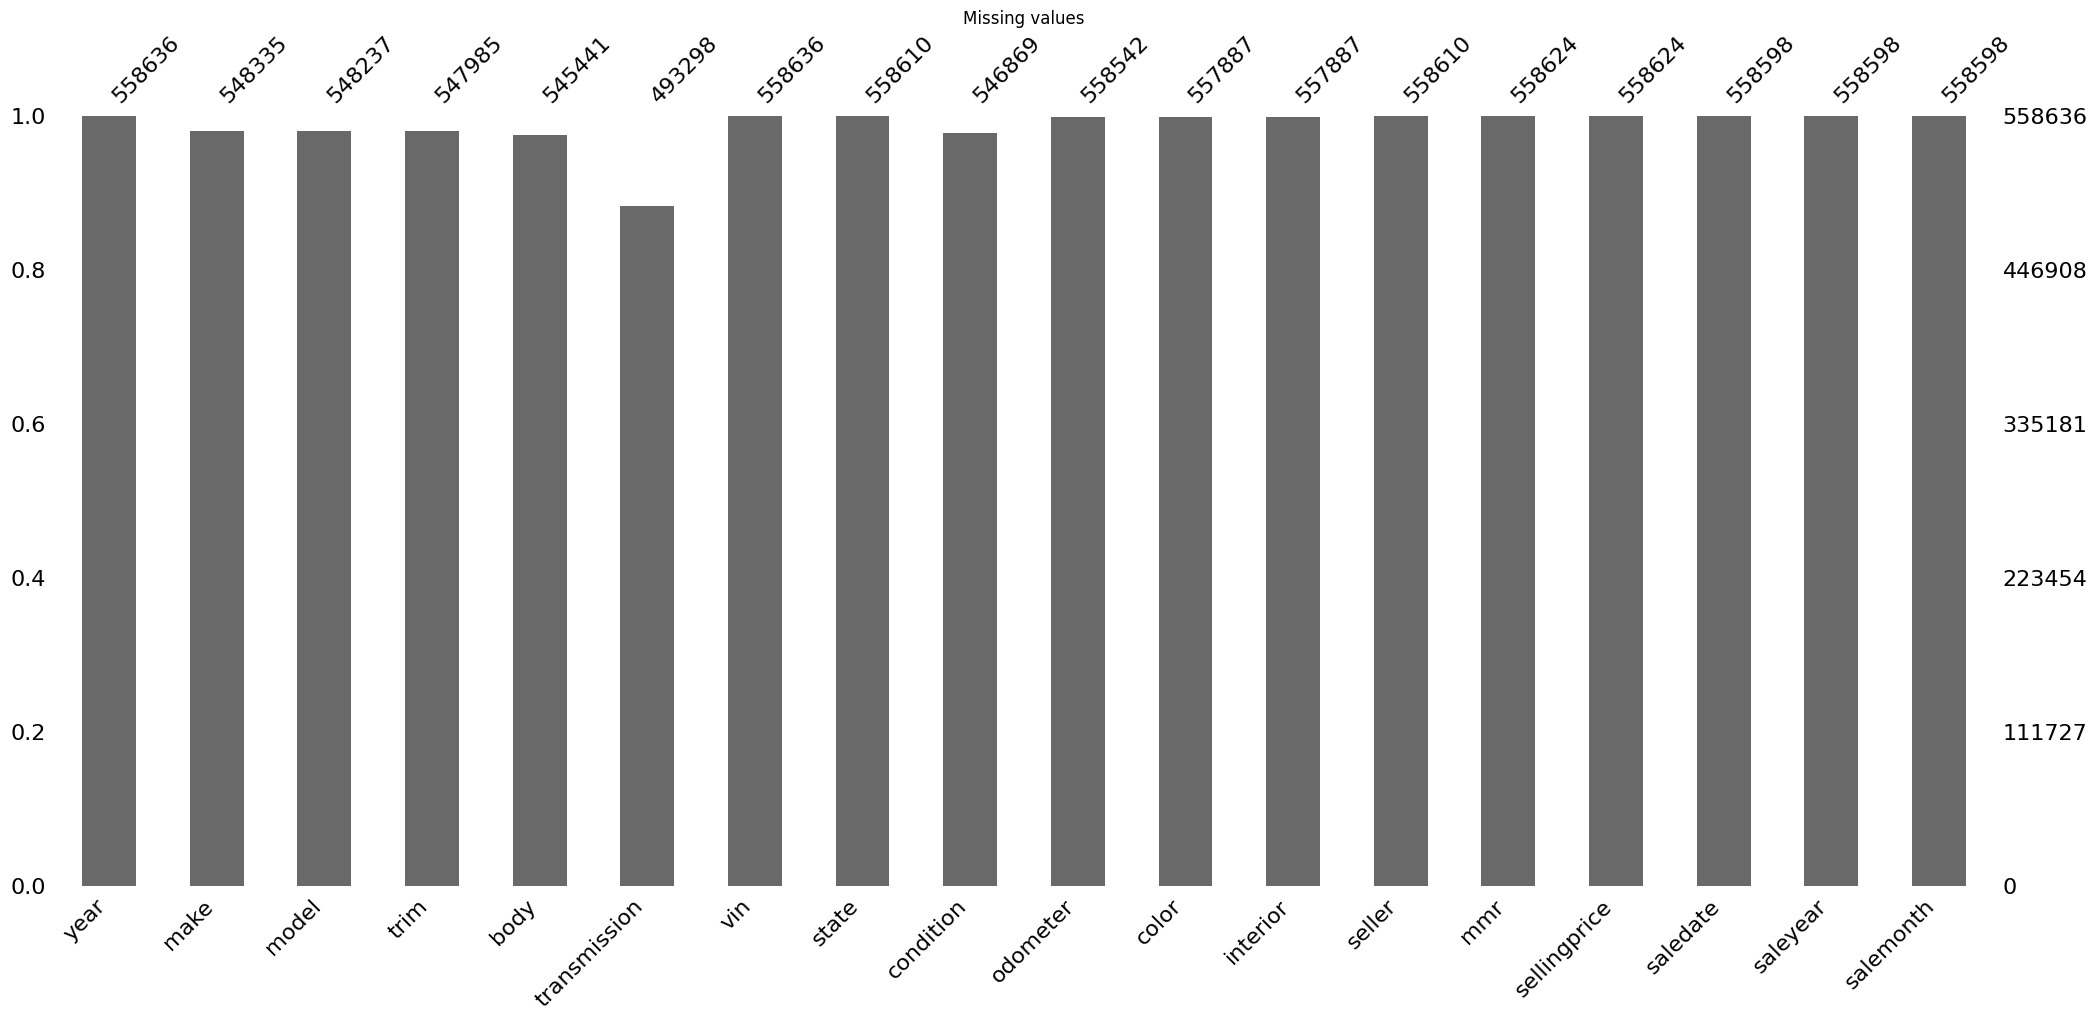

In [ ]:
duplicated_quantity = df.duplicated().sum()
null_quantity = df.isnull().sum()
null_percentages = df.isnull().mean() * 100

duplicated_null_stats = pd.DataFrame({
    'Số giá trị duplicate': duplicated_quantity,
    'Số lượng giá trị null': null_quantity,
    'Tỷ lệ giá trị null (%)': null_percentages
})

print("Thông tin về duplicated value và missing value:")
display(duplicated_null_stats)

msno.bar(df)
plt.title('Missing values')
plt.show()

- **Vấn đề**
> - Ở các cột khác ta có thể sử dụng phương pháp điền giá trị thống kê như mode (giá trị xuất hiện nhiều nhất) và mean (giá trị trung bình) để điền vào hầu hết các giá trị thiếu trong dữ liệu. Có nghĩa là nếu dữ liệu có phân phối lệch hoặc không đồng đều, ta có thể sử dụng mode hoặc mean để đại diện cho giá trị trung tâm của dữ liệu.
> - Nhưng ở cột **'transmission'** khá là phức tạp do là biến category có nhiều missing value nhất. Ta sẽ phân vân giữa phương pháp xây dựng mô hình dự đoán để điền giá trị và điền luôn giá trị thống kê. Phương pháp xây dựng mô hình dự đoán có vẻ hợp lý nhưng với sự mất cân bằng lớn trong dữ liệu thì ta nên chọn phương pháp điền giá trị thống kê.
> - Ngoài ra với mục tiêu tìm ra xu hướng cũng như trả lời các câu hỏi về business dựa trên tập dữ liệu này thì ta nên giải quyết missing value cho **'transmission'** bằng cách thay bằng một giá trị mới như là **'unknown'**

- **Xử lý**
> - Đối với các biến có tỷ lệ null < 0.005%: loại bỏ chúng
> - Đối với **color** và **interior**: điền giá trị '**unknown**' tương tự với thay thế ở '-' ở phần trên
> - Đối với các biến **category**: điền giá trị phổ biến (mode)
> - Đối với các biến **numeric**: điển giá trị trung bình (mean)
> - Đối với biến **target (sellingprice)**: loại bỏ


In [ ]:
# Drop với những cột có tỷ lệ null < 0.005%
df.dropna(subset=['state'],axis='rows',inplace=True)
df.dropna(subset=['seller'],axis='rows',inplace=True)
df.dropna(subset=['saledate'],axis='rows',inplace=True)
df.dropna(subset=['saleyear'],axis='rows',inplace=True)
df.dropna(subset=['salemonth'],axis='rows',inplace=True)

# Category
df.loc[:,'make'] = df.loc[:,['make']].fillna(df['make'].mode()[0])
df.loc[:,'model'] = df.loc[:,['model']].fillna(df['model'].mode()[0])
df.loc[:,'body'] = df.loc[:,['body']].fillna(df['body'].mode()[0])
df.loc[:,'trim'] = df.loc[:,['trim']].fillna(df['trim'].mode()[0])

# Numeric
df.loc[:,'condition'] = df.loc[:,['condition']].fillna(df['condition'].mean())
df.loc[:,'odometer'] = df.loc[:,['odometer']].fillna(df['odometer'].mean())
df.loc[:,'mmr'] = df.loc[:,['mmr']].fillna(df['mmr'].mean())

# Target
df.dropna(subset=['sellingprice'],axis='rows',inplace=True)

# Trường hợp phức tạp hơn
df.loc[:,'color'] = df.loc[:,['color']].fillna('unknown')
df.loc[:,'interior'] = df.loc[:,['interior']].fillna('unknown')

transmission_for_trend = df.loc[:,['transmission']].fillna('unknown')
df.loc[:,'transmission'] = df.loc[:,['transmission']].fillna(df['transmission'].mode()[0])


In [ ]:
df.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saleyear,salemonth
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-14 20:30:00+00:00,2015.0,1.0
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-28 20:30:00+00:00,2015.0,1.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 04:30:00+00:00,2014.0,12.0


### Khám phá dữ liệu

#### Phân tích đơn biến

**Các biến liên tục**
>**Câu hỏi đặt ra**
> - Câu hỏi đưa ra là thị trường xe ưa chuộng xe mới hay xe cũ. Và khách hàng thường chọn những chiếc xe có số odo trong khoảng bao nhiêu?
> - Giá cả của những chiếc xe đã bán gia động như thế nào?



In [ ]:
df.describe()

,year,condition,odometer,mmr,sellingprice,saleyear,salemonth
count,558598.000000,558598.000000,558598.000000,558598.000000,558598.000000,558598.000000,558598.00000
mean,2010.036848,30.673056,68344.340458,13764.550088,13607.115559,2014.904178,3.79795
std,3.966426,13.258546,53392.147502,9675.304554,9745.346292,0.294347,3.22709
min,1982.000000,1.000000,1.000000,25.000000,1.000000,2014.000000,1.00000
25%,2007.000000,24.000000,28397.250000,7100.000000,6900.000000,2015.000000,1.00000
50%,2012.000000,34.000000,52294.000000,12250.000000,12100.000000,2015.000000,2.00000
75%,2013.000000,41.000000,99123.000000,18300.000000,18200.000000,2015.000000,6.00000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000,2015.000000,12.00000


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


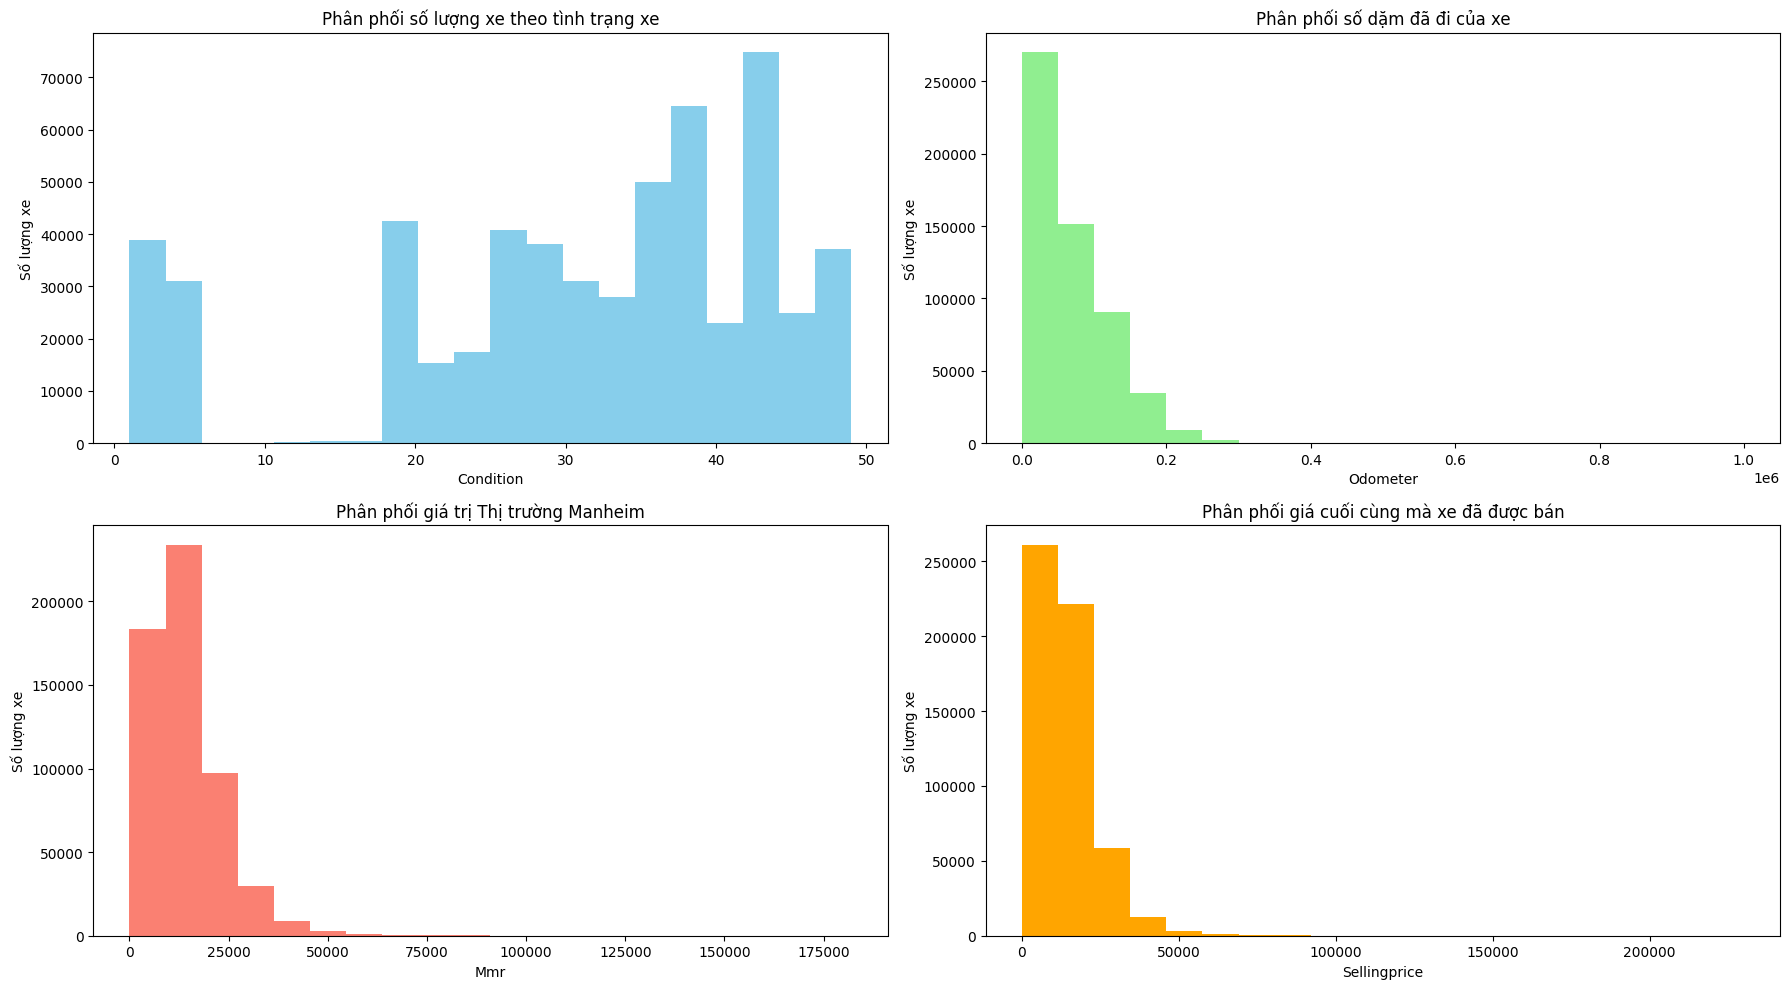

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

variables = ['condition', 'odometer', 'mmr', 'sellingprice']

titles = ['Phân phối số lượng xe theo tình trạng xe',
          'Phân phối số dặm đã đi của xe',
          'Phân phối giá trị Thị trường Manheim',
          'Phân phối giá cuối cùng mà xe đã được bán']

colors = ['skyblue', 'lightgreen', 'salmon', 'orange']

for i, variable in enumerate(variables):
    row_index = i // 2
    col_index = i % 2

    axes[row_index, col_index].hist(df[variable], bins=20, color=colors[i])
    axes[row_index, col_index].set_title(titles[i])
    axes[row_index, col_index].set_xlabel(variable.capitalize())
    axes[row_index, col_index].set_ylabel('Số lượng xe')

plt.tight_layout()
plt.show()


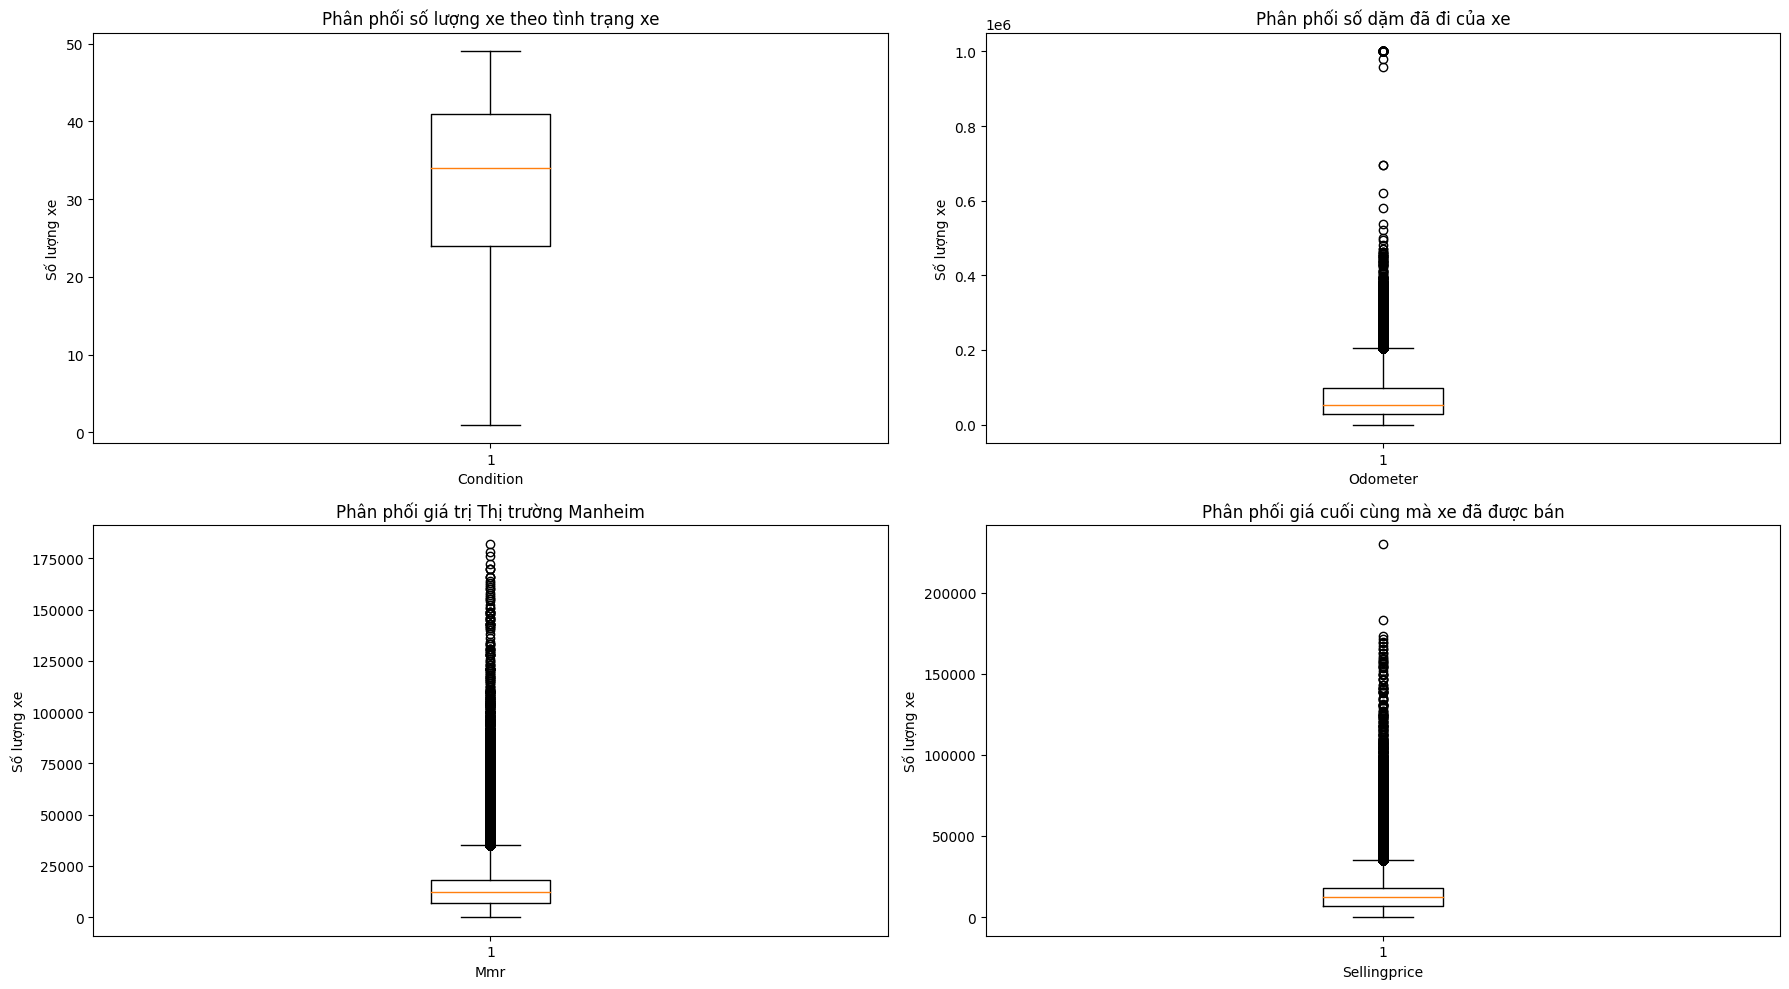

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

variables = ['condition', 'odometer', 'mmr', 'sellingprice']

titles = ['Phân phối số lượng xe theo tình trạng xe',
          'Phân phối số dặm đã đi của xe',
          'Phân phối giá trị Thị trường Manheim',
          'Phân phối giá cuối cùng mà xe đã được bán']

for i, variable in enumerate(variables):
    row_index = i // 2
    col_index = i % 2
    axes[row_index, col_index].boxplot(df[variable])
    axes[row_index, col_index].set_title(titles[i])
    axes[row_index, col_index].set_xlabel(variable.capitalize())
    axes[row_index, col_index].set_ylabel('Số lượng xe')

plt.tight_layout()
plt.show()


**Trả lời cho câu hỏi:**
> -  Về tính trạng xe: số lượng xe được bán với nhiều tình trạng khác nhau, tuy nhiên có thể thấy số lượng xe có tình trạng mới được bán ít hơn hẳn so với xe cũ. Cho thấy thị trường xe cũ rất tiềm năng.
> - Về số odo: có thể thấy khách hàng thiên hướng mua xe có số odo thấp khoảng 28397 - 99123 dặm, tuy nhiên vẫn có 1 tệp khách hàng tương dối mua xe số odo từ 100000 đến 500000.
> - Về giá thị trường: phần lớn giá giao động trong khoảng 7100 - 18300 đôla và giá trung bình là 13765 đô la, ngoài ra vẫn còn trải dài tới 182000 đô la
> - Về giá bán cuối cùng: phần lớn giao động trong khoảng 6900 - 18200 đôla và giá trung bình là 13607 đô la, ngoài ra vẫn còn trải dài tới khoảng 175000 đô la

**Các biến phân loại**
>**Câu hỏi đặt ra**
> - Loại hộp số nào được ưa chuộng hơn?
> - Màu xe nào là phổ biến và dễ bán?
> - Màu nội thất nào được ưa chuộng ?

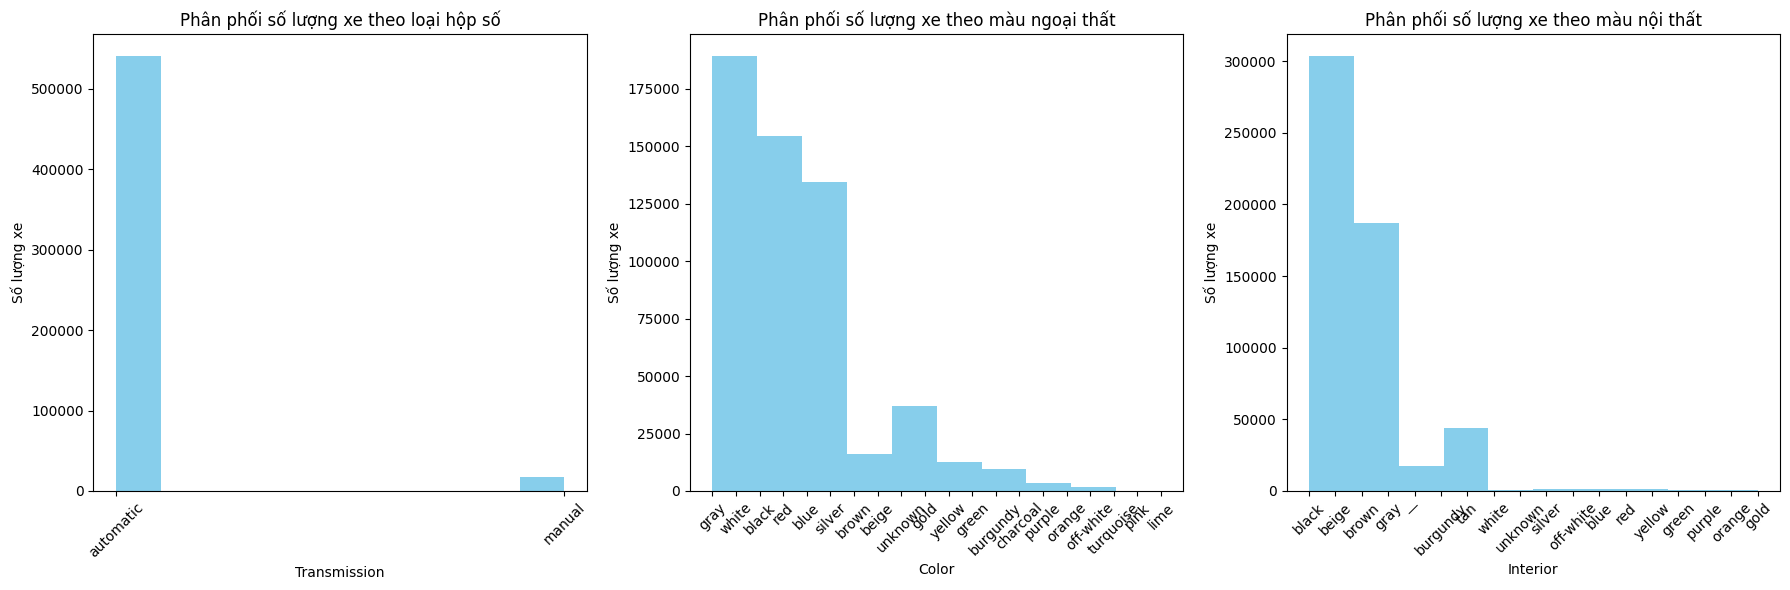

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

variables = ['transmission', 'color', 'interior']

titles = ['Phân phối số lượng xe theo loại hộp số',
          'Phân phối số lượng xe theo màu ngoại thất',
          'Phân phối số lượng xe theo màu nội thất']

for i, (variable, title) in enumerate(zip(variables, titles)):
    axes[i].hist(df[variable], color='skyblue')
    axes[i].set_title(title)
    axes[i].set_xlabel(variable.capitalize())
    axes[i].set_ylabel('Số lượng xe')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Trả lời câu hỏi**
> - Về phân loại hộp số: khác hàng thích xe có hộp số tự động hơn hẳn. Nguyên nhân có thể là do nó phù hợp với đại trà, thoải mái, dễ thao tác, dễ lái.
> - Về màu sắc ngoại thât: các màu được bán chạy là các màu xám, trắng, đen, đỏ, xanh dương, bạc có số lượng bán ra trên mức 130 ngàn xe mỗi màu. Đây là các màu phổ thông, thường được ưa chuộng nhiều. các màu còn lại chỉ ở dưới khoảng 18.750 ngàn chiếc mỗi màu
> - Về màu nội thất: có thể thấy phần lớn xe bán được có nội thất màu tối (đen, be, nâu, xám, tan, đỏ tía.

**Câu hỏi đặt ra**
> - 3 hãng xe nào chiếm thị phần lớn nhất?
> - Những kiểu dáng nào chiếm nhiều thị trường?
> - Sức mua ở các bang như thế nào?


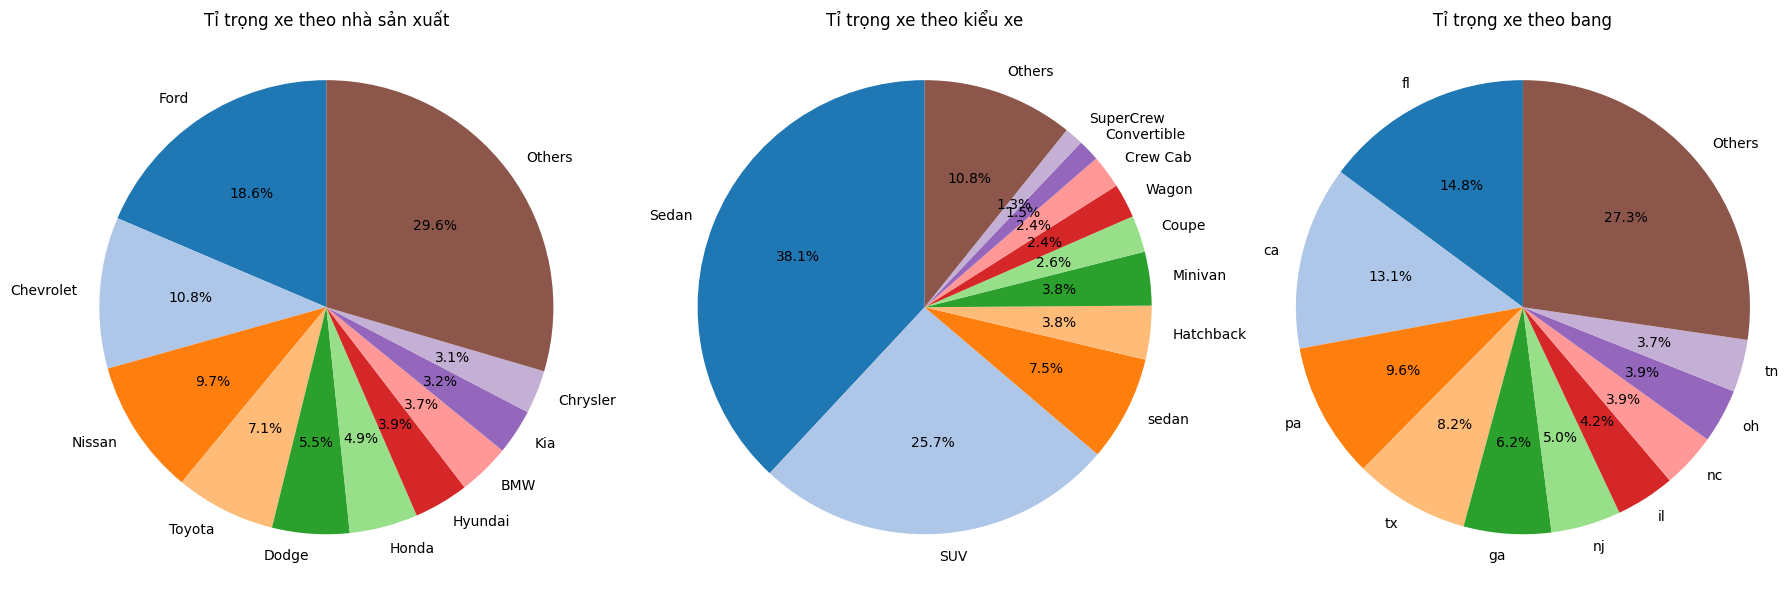

In [ ]:
variables = ['make', 'body', 'state']
titles = ['Tỉ trọng xe theo nhà sản xuất',
          'Tỉ trọng xe theo kiểu xe',
          'Tỉ trọng xe theo bang']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, variable in enumerate(variables):
    # Tính toán số lượng hàng cho từng giá trị duy nhất trong cột
    counts = df[variable].value_counts()

    top_counts = counts.head(10)
    others_count = counts[10:].sum()
    top_counts['Others'] = others_count

    axes[i].pie(top_counts, labels=top_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
    axes[i].set_title(titles[i])
    axes[i].axis('equal')

plt.tight_layout()
plt.show()


**Trả lười câu hỏi**
> - Về nhà sản xuất: thương hiệu Ford chiếm thị phần cao nhất với (18.6%), thứ hai là Chevrolet (10.8%), thứ 3 là Nissan (9.7%), ngoài ra là các ông lớn khác trong ngành oto với thị phần từ 3.1% - 7.1%
> - Về kiểu xe: Đa số là kiểu Sedan (45.6%) và SUV (25.7%), phần còn lại chỉ từ 3.8% trở xuống
> - Về bang: các bang fl, cd, pa, tx, gan, nj là các bang có sức mua tương đối lớn từ 5% đến 14%. Có thể là do kinh tế, cũng như hệ thống đường xá ở các bang này phát triển tốt.   

**Biến thời gian**
> **Câu hỏi đặt ra**
> - Năm sản xuất nào có số lượng xe bán ra cao?
> - So sánh lượng xe bán ra giữa các năm và nhận định nguyên nhân.
> - Tháng nào trong năm là thời điểm tốt để bán xe?

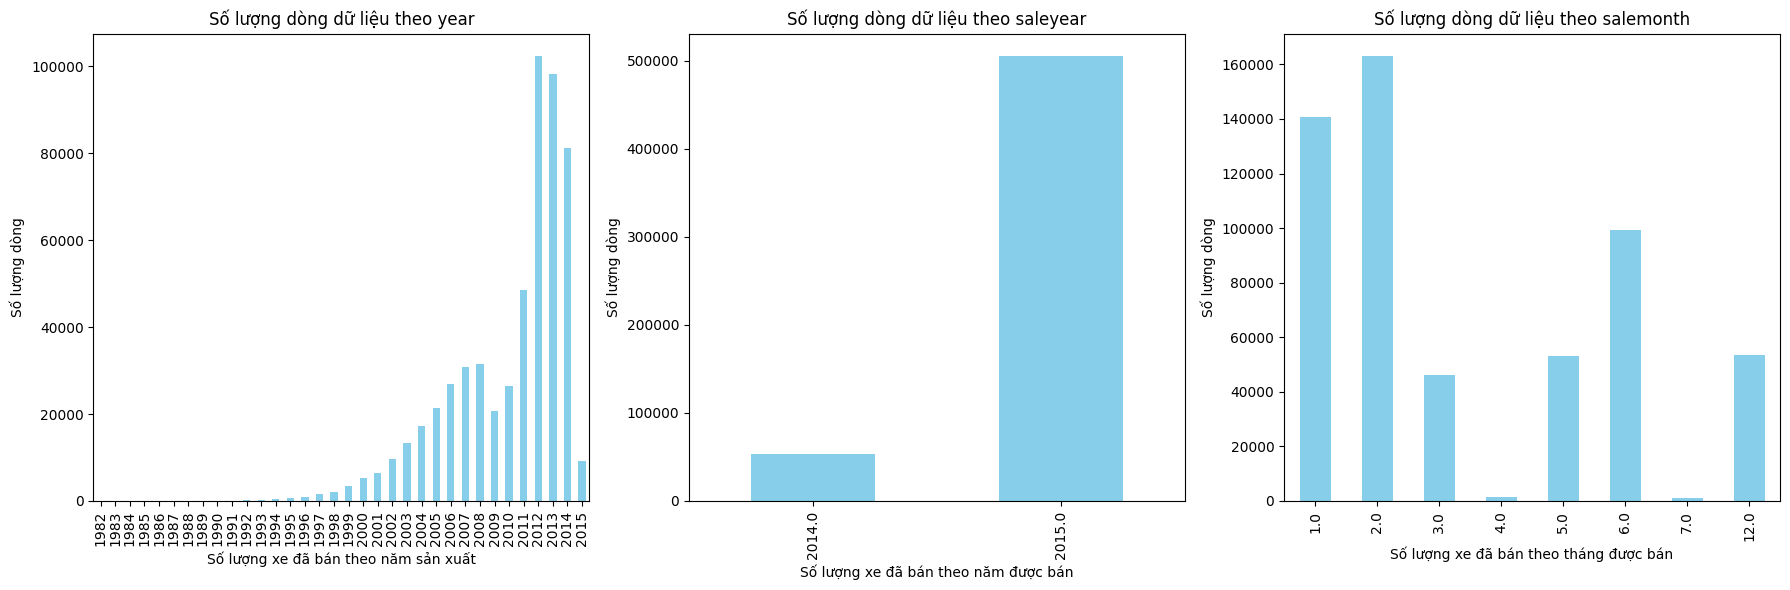

In [ ]:
columns = ['year', 'saleyear', 'salemonth']
titles = ['Số lượng xe đã bán theo năm sản xuất',
          'Số lượng xe đã bán theo năm được bán',
          'Số lượng xe đã bán theo tháng được bán']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, column in enumerate(columns):
    counts = df[column].value_counts().sort_index()

    counts.plot(kind='bar', ax=axes[i], color='skyblue')

    axes[i].set_title(f'Số lượng dòng dữ liệu theo {column}')
    axes[i].set_xlabel(titles[i])
    axes[i].set_ylabel('Số lượng dòng')

plt.tight_layout()
plt.show()


**Trả lời câu hỏi**
> - Về năm sản xuất: các xe đời từ 2012 đến 2014 được bán nhiều hơn hẳn so với những năm còn lại có thể do sau thời gian 2008 kinh tế phục hồi, nên những năm này số lượng xe được sản xuất ra nhiều, hoặc do thười điểm bán các xe có tuổi đời ngắn được ưa chuộng.
> - Về năm xe được bán: dẽ thấy rõ năm 2015 có số lượng xe bán được cao hơn hẳn. Nguyên nhân là do năm 2015 kinh tế thế giới phục hồi dần sau suy thoái toàn cầu.
> - Về tháng mà xe được bán có thể thấy tháng 12 và 3 tháng đầu năm có lượng mua cao liên tục, ngoài ra là đợt tháng 5, 6. Nguyên nhân có thể là do nhu cầu mua sắm lớn vào dịp cuối năm và đầu năm. Đây là thời điểm tốt để tiếp cận thị trường xe oto.

#### Phân tích 2 biến

##### Ảnh hưởng của các yếu tố đến giá bán của xe

- **Xu hướng của giá bán theo năm sản xuất của xe**
> - Có sự tăng giảm giá bán theo năm sản xuất không? Có phải những mẫu xe cũ hơn được bán với giá rẻ hơn hay không?

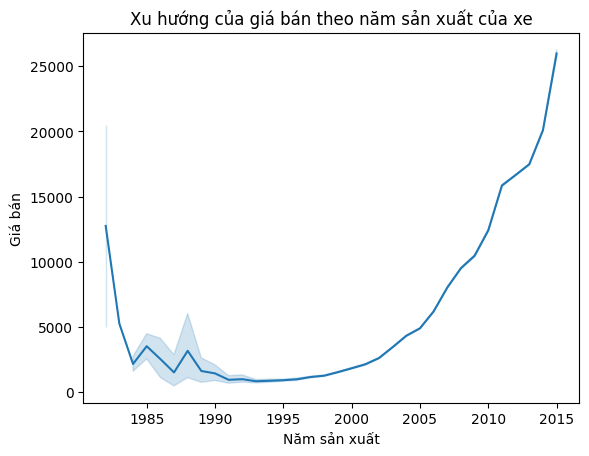

In [ ]:
sns.lineplot(data=df, x='year', y='sellingprice')
plt.title('Xu hướng của giá bán theo năm sản xuất của xe')
plt.xlabel('Năm sản xuất')
plt.ylabel('Giá bán')
plt.show()

> - Biểu đồ cho thấy xu hướng chung là giá bán xe giảm dần theo năm sản xuất. Tuy nhiên, có một số ngoại lệ rằng giá bán của năm cũ hơn sẽ lớn hơn. Điều này có thể là do một số yếu tố, chẳng hạn như sự ra mắt của một mẫu xe mới hoặc sự thay đổi về điều kiện kinh tế.
> - Nhìn chung, những mẫu xe cũ hơn được bán với giá rẻ hơn. Tuy nhiên, giá bán thực tế của một chiếc xe cũ sẽ phụ thuộc vào nhiều yếu tố, chẳng hạn như thương hiệu, kiểu dáng, tình trạng và số lượng km đã chạy.


- **Mối quan hệ giữa số dặm đã đi và giá bán**
> - Có sự ảnh hưởng của số dặm đã đi đến giá bán không? Có những mẫu xe nào có số dặm cao nhưng vẫn bán với giá cao không?


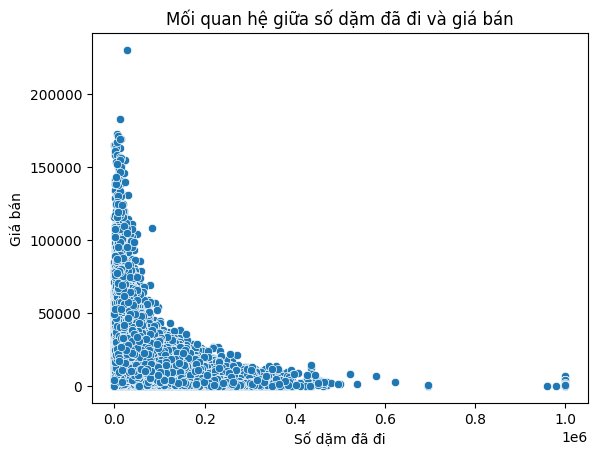

In [ ]:
sns.scatterplot(data=df, x='odometer', y='sellingprice')
plt.title('Mối quan hệ giữa số dặm đã đi và giá bán')
plt.xlabel('Số dặm đã đi')
plt.ylabel('Giá bán')
plt.show()

> - Nhìn chung, xe có số dặm đã đi cao hơn sẽ được bán với giá rẻ hơn xe có số dặm đã đi thấp hơn. Điều này là do xe có số dặm đã đi cao hơn có khả năng bị hao mòn và hư hỏng nhiều hơn.
> - Tuy nhiên, có một số ngoại lệ cho quy tắc này. Một số mẫu xe có thể giữ giá trị tốt hơn những mẫu xe khác, ngay cả khi chúng có số dặm đã đi cao. Điều này có thể là do một số yếu tố, chẳng hạn như: thương hiệu nổi tiếng, tình trạng xe còn rất tốt,...
  
- **Phân phối giá trị thị trường Manheim theo màu sắc của xe**
> - Insight: Có màu sắc nào phổ biến hơn trong các xe có giá trị thị trường cao?

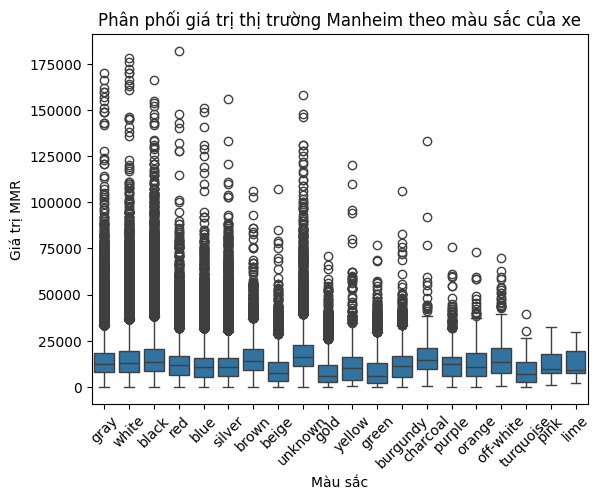

In [ ]:
sns.boxplot(data=df, x='color', y='mmr')
plt.title('Phân phối giá trị thị trường Manheim theo màu sắc của xe')
plt.xlabel('Màu sắc')
plt.ylabel('Giá trị MMR')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.groupby('color')['mmr'].mean().sort_values(ascending=False)

color
unknown      18047.169570
charcoal     16577.818372
black        15712.970559
brown        15627.777778
off-white    15048.964088
white        14759.251843
gray         14157.198964
red          12817.933972
orange       12815.719788
lime         12748.333333
pink         12716.071429
yellow       12494.299611
purple       12276.667736
burgundy     12053.559483
silver       11961.795775
blue         11681.777863
beige         9592.863730
turquoise     8651.271186
green         8493.008698
gold          8441.565999
Name: mmr, dtype: float64

In [ ]:
df.groupby('color')['mmr'].count().sort_values(ascending=False)

color
black        110932
white        106622
silver        83354
gray          82814
blue          51126
red           43557
unknown       25429
green         11382
gold          11341
beige          9217
burgundy       8969
brown          6714
orange         2077
purple         1559
off-white      1448
yellow         1285
charcoal        479
turquoise       236
pink             42
lime             15
Name: mmr, dtype: int64

> - Nhìn chung ta có 4 nhóm màu có giá thị trường trung bình từ lớn nhất đến nhỏ nhất là:
> 1. Nhóm màu độc lạ hoặc custom hoặc do lỗi thiếu dữ liệu **'unknown'**: đây là nhóm màu có giá thị trường trung bình lớn nhất
> 2. Nhóm màu tối đen (charcoal, black, brown,...)
> 3. Nhóm màu sáng trắng (off-white, white, gray,...)
> 4. Nhóm màu đơn sắc cá tính (còn lại): là nhóm màu có giá thị trường trung bình nhỏ nhất
> - Ngoài ra màu đen và trắng là hai màu phổ biến nhất trong tập dữ liệu. Màu đỏ là màu có giá thị trường đạt giá trị lớn nhất

- **Mối quan hệ giữa loại hộp số và giá bán**
> - Có sự ảnh hưởng của loại hộp số đến giá bán không?

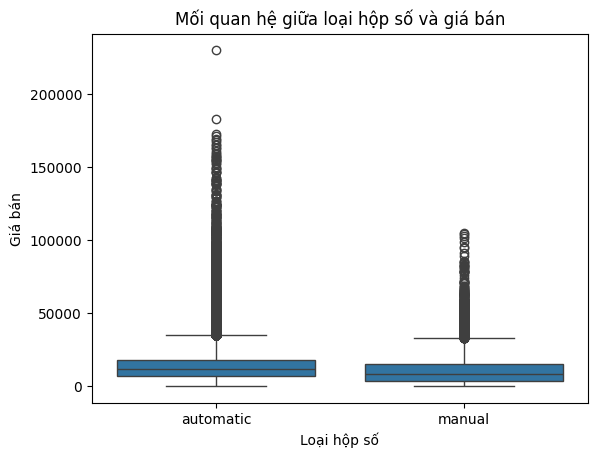

In [ ]:
sns.boxplot(data=df, x='transmission', y='sellingprice')
plt.title('Mối quan hệ giữa loại hộp số và giá bán')
plt.xlabel('Loại hộp số')
plt.ylabel('Giá bán')
plt.show()

> - Nhìn chung ta thấy giá trị của hộp số tự động (automatic) sẽ mắc hơn là hộp số cơ (manual) cả về giá trị trung bình, lớn nhất, nhỏ nhất.
> - Nhưng để kết luận có sự ảnh hưởng của loại hộp số đến giá bán thì vẫn chưa thể bởi vì:
> 1. Giá bán của sản phẩm không phụ thuộc hoàn toàn vào loại hộp số. Có những sản phẩm có hộp số tự động có giá thấp hơn sản phẩm có hộp số cơ, và ngược lại.
> 2. Có sự phân bố đều đặn của các điểm dữ liệu trên biểu đồ. Điều này cho thấy không có sự tập trung mạnh mẽ nào về giá bán cho một loại hộp số cụ thể.
> 3. Có thể có các yếu tố khác ngoài loại hộp số ảnh hưởng đến giá bán của sản phẩm. Ví dụ, thương hiệu, tính năng, hiệu suất, v.v., đều có thể đóng vai trò quan trọng trong việc xác định giá bán.



- **Mối quan hệ giữa tình trạng xe và giá bán**
> - Có sự ảnh hưởng của tình trạng xe đến giá bán không?

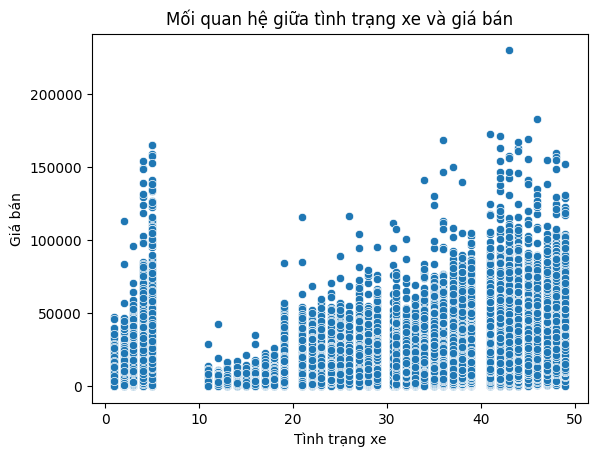

In [ ]:
sns.scatterplot(data=df, x='condition', y='sellingprice')
plt.title('Mối quan hệ giữa tình trạng xe và giá bán')
plt.xlabel('Tình trạng xe')
plt.ylabel('Giá bán')
plt.show()

> - Giá bán xe có xu hướng giảm dần theo mức độ xuống cấp của xe: Cụ thể tình trạng xe từ 50 giảm dần xuống 10 có giá bán xu hướng giảm dần.
> - Nhưng ở mức độ từ 0 đến 10: vẫn có rất nhiều trường hợp giá xe lớn hơn so hơn tình trạng xe tốt hơn. Điều này phản ảnh rằng giá xe ảnh hưởng bởi không chỉ tình trạng xe mà còn nhiều yếu tố khác như thương hiệu, số dặm đã đi,... Ngoài ra đây cũng có thể là một điểm sai sót dữ liệu hoặc là những trường hợp đặc biệt trong mua bán xe.
> - Nhìn chung tình trạng xe cũng là một yếu tố quan trọng ảnh hưởng đến giá bán xe


- **Phân phối giá bán theo bang:**
> - Có sự khác biệt về giá bán giữa các bang không? Có bang nào có giá bán cao hơn trung bình không?

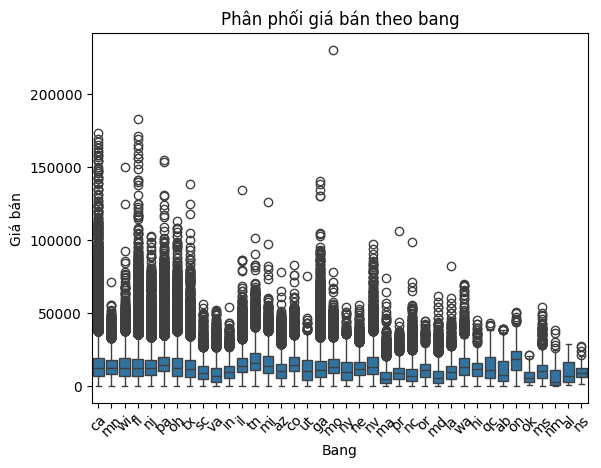

In [ ]:
sns.boxplot(data=df, x='state', y='sellingprice')
plt.title('Phân phối giá bán theo bang')
plt.xlabel('Bang')
plt.ylabel('Giá bán')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print("Các bang có giá bán trung bình lớn hơn trung bình tổng thể:")
df_temp = df.groupby('state')['sellingprice'].mean()
print(df_temp[df_temp > df['sellingprice'].mean()])
print("Các bang có giá bán trung bình nhỏ hơn trung bình tổng thể:")
df_temp = df.groupby('state')['sellingprice'].mean()
print(df_temp[df_temp < df['sellingprice'].mean()])

Các bang có giá bán trung bình lớn hơn trung bình tổng thể:
state
ca    14501.237218
co    15876.313521
fl    13872.347182
il    14790.945436
mi    14884.752531
mn    13708.186022
mo    14466.192344
nj    13609.126084
nv    15095.667692
oh    14386.320847
on    17812.623475
pa    15973.035104
tn    17001.700005
wa    13945.389563
wi    13999.407656
Name: sellingprice, dtype: float64
Các bang có giá bán trung bình nhỏ hơn trung bình tổng thể:
state
ab    11172.036638
al     9142.307692
az    11532.658271
ga    12918.193472
hi    12190.824576
in    10716.874855
la    10522.540183
ma     6726.742458
md     7393.876682
ms    11244.130200
nc     8660.245994
ne    12554.518823
nm     6291.812865
ns    10213.114754
ny    11374.536761
ok     6918.055556
or    11558.484848
pr     9410.770642
qc    13292.971888
sc    10319.891192
tx    13205.213974
ut    12065.625817
va     8572.570906
Name: sellingprice, dtype: float64


> - Có sự khác biệt về giá bán giữa các bang: Nhìn vào số liệu, chúng ta thấy có sự biến động đáng kể về giá bán trung bình giữa các bang. Một số bang có giá bán trung bình lớn hơn trung bình tổng thể, trong khi một số bang có giá bán trung bình nhỏ hơn trung bình tổng thể.
> - Có một số bang như Colorado (CO), Pennsylvania (PA), Tennessee (TN), và Ontario (ON) có giá bán trung bình lớn hơn trung bình tổng thể. Trong khi đó, một số bang như Maryland (MD), New Mexico (NM), và Oklahoma (OK) có giá bán trung bình nhỏ hơn trung bình tổng thể.
> - Nguyên nhân có sự khác biệt đáng kể như vậy là vì: Các yếu tố kinh tế và mức độ phát triển của bang, Sự phổ biến của các loại xe trong từng bang, Chính sách và quy định về xe hơi của từng bang,...


##### Thế mạnh về kiểu thân xe của từng hãng

- **Tính phổ biến của các loại thân xe theo từng nhà sản xuất**
> - Có sự ưu tiên về loại thân xe nào trong từng nhà sản xuất không?

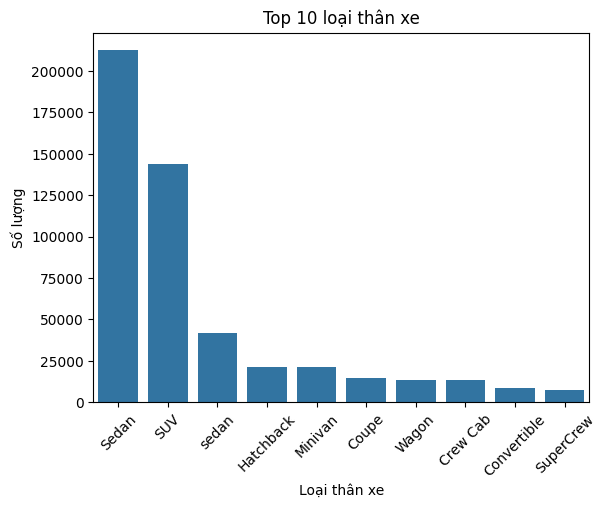

In [ ]:
# Tính toán số lượng của mỗi loại thân xe
body_counts = df['body'].value_counts()

# Chọn ra top 10 loại thân xe
top_10_bodies = body_counts.head(10)

# Vẽ biểu đồ cột đếm cho top 10 loại thân xe
sns.barplot(x=top_10_bodies.index, y=top_10_bodies.values)
plt.title('Top 10 loại thân xe')
plt.xlabel('Loại thân xe')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.show()

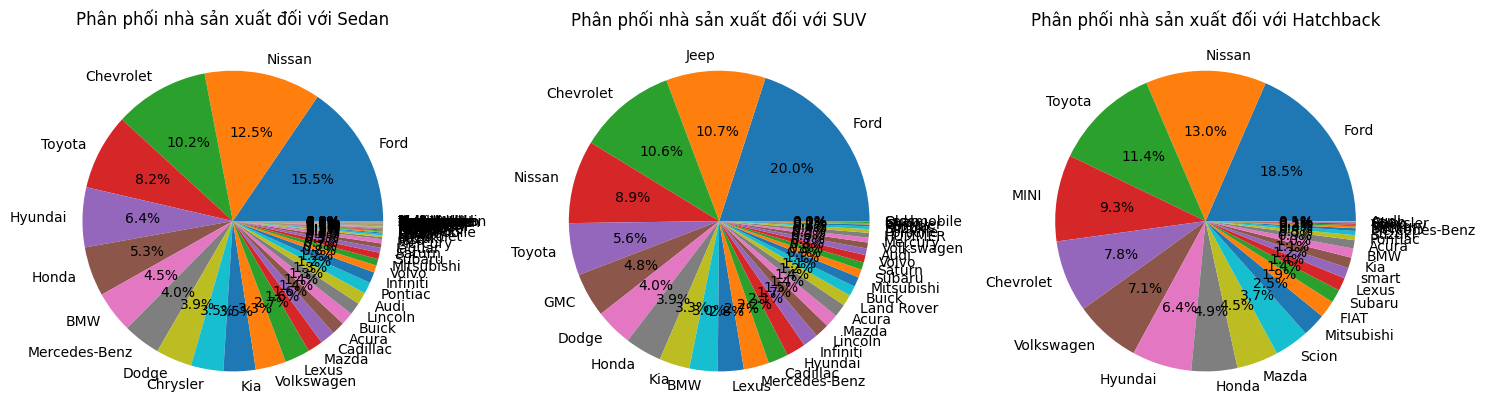

In [ ]:
# Lọc dữ liệu cho từng loại thân xe
sedan_data = df[df['body'] == 'Sedan']
suv_data = df[df['body'] == 'SUV']
hatchback_data = df[df['body'] == 'Hatchback']

# Tính toán số lượng của mỗi nhà sản xuất trong từng loại thân xe
sedan_make_counts = sedan_data['make'].value_counts()
suv_make_counts = suv_data['make'].value_counts()
hatchback_make_counts = hatchback_data['make'].value_counts()

# Vẽ biểu đồ tròn cho mỗi loại thân xe
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.pie(sedan_make_counts, labels=sedan_make_counts.index, autopct='%1.1f%%')
plt.title('Phân phối nhà sản xuất đối với Sedan')

plt.subplot(1, 3, 2)
plt.pie(suv_make_counts, labels=suv_make_counts.index, autopct='%1.1f%%')
plt.title('Phân phối nhà sản xuất đối với SUV')

plt.subplot(1, 3, 3)
plt.pie(hatchback_make_counts, labels=hatchback_make_counts.index, autopct='%1.1f%%')
plt.title('Phân phối nhà sản xuất đối với Hatchback')

plt.tight_layout()
plt.show()

In [ ]:
df.groupby('make')['body'].value_counts().sort_values(ascending=False).head(20)

make           body     
Ford           Sedan        32905
               SUV          28776
Nissan         Sedan        26651
Chevrolet      Sedan        21630
Toyota         Sedan        17405
Jeep           SUV          15368
Chevrolet      SUV          15173
Hyundai        Sedan        13663
Nissan         SUV          12863
Honda          Sedan        11331
BMW            Sedan         9492
Mercedes-Benz  Sedan         8559
Dodge          Sedan         8251
Toyota         SUV           8073
Ford           SuperCrew     7423
Chrysler       Sedan         7387
Kia            Sedan         7343
Volkswagen     Sedan         6948
GMC            SUV           6836
Dodge          Minivan       6810
Name: count, dtype: int64

> - Phổ biển nhất là Sedan kế tiếp là SUV, sedan, suv,...
> - Tìm hiểu và so sánh thị trường ta thấy: Số lượng SUV đang tăng mạnh trong những năm gần đây. Điều này có thể là do nhu cầu của người tiêu dùng đối với những chiếc xe đa dụng, có khả năng off-road và chở được nhiều người.
Số lượng Sedan đang giảm dần. Điều này có thể là do xu hướng chuyển sang các loại thân xe SUV và Hatchback. Số lượng Hatchback đang tăng nhẹ. Điều này có thể là do Hatchback là lựa chọn phù hợp cho những người trẻ tuổi, độc thân hoặc gia đình nhỏ.

- **Mối quan hệ giữa màu sắc nội thất và màu sắc ngoại thất:**
> - Có mối quan hệ nào giữa màu sắc nội thất và màu sắc ngoại thất của xe không?

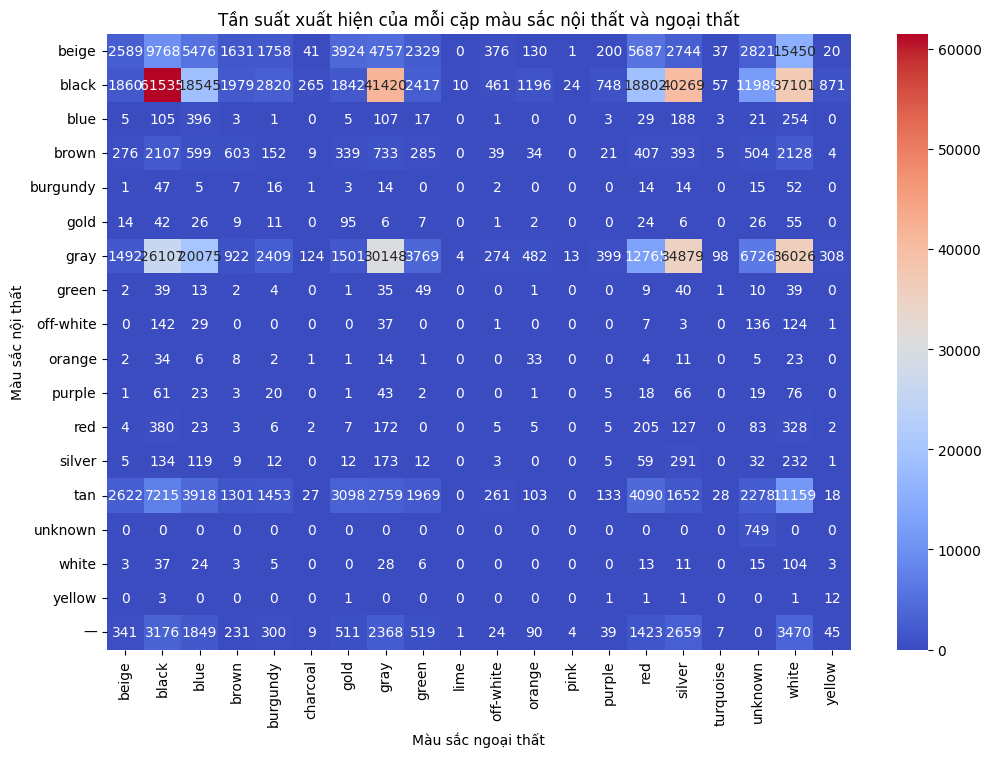

In [ ]:
color_matrix = df.groupby(['interior', 'color']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(color_matrix, cmap='coolwarm', annot=True, fmt='d')
plt.title('Tần suất xuất hiện của mỗi cặp màu sắc nội thất và ngoại thất')
plt.xlabel('Màu sắc ngoại thất')
plt.ylabel('Màu sắc nội thất')
plt.show()

> - Dựa vào biểu đồ trên, không có mối quan hệ trực tiếp nào giữa màu sắc nội thất và màu sắc ngoại thất của xe.
> - Màu sắc nội thất được lựa chọn dựa trên sở thích cá nhân của người mua xe, phong cách xe và xu hướng thị trường. Một số yếu tố khác có thể ảnh hưởng đến lựa chọn màu sắc nội thất bao gồm chất liệu ghế, loại ánh sáng và kích thước khoang lái. Màu sắc ngoại thất cũng được lựa chọn dựa trên sở thích cá nhân của người mua xe, phong cách xe và xu hướng thị trường. Một số yếu tố khác có thể ảnh hưởng đến lựa chọn màu sắc ngoại thất bao gồm khí hậu, loại địa hình và khả năng nhìn thấy của xe.
> - Ta thấy được trong tập dữ liệu có rất nhiều chiếc xe cà nội thất và ngoại thất đều là màu đen hoặc đen-trắng, đen-xám,... là những cặp màu phổ thông thường thấy cho xe. Ngoài ra có rất nhiều cặp màu cá tính khác chứng minh cho màu sắc nội ngoại thất là dựa trên sở thích cá nhân của người mua xe.
> - Tuy nhiên, có một số mối quan hệ gián tiếp giữa màu sắc nội thất và màu sắc ngoại thất của xe: Màu sắc có thể ảnh hưởng đến cảm xúc và nhận thức, Màu sắc có thể ảnh hưởng đến giá trị bán lại của xe, Màu sắc có thể ảnh hưởng đến hiệu suất nhiên liệu của xe (hấp thụ nhiệt),...

#### Phân tích đa biến

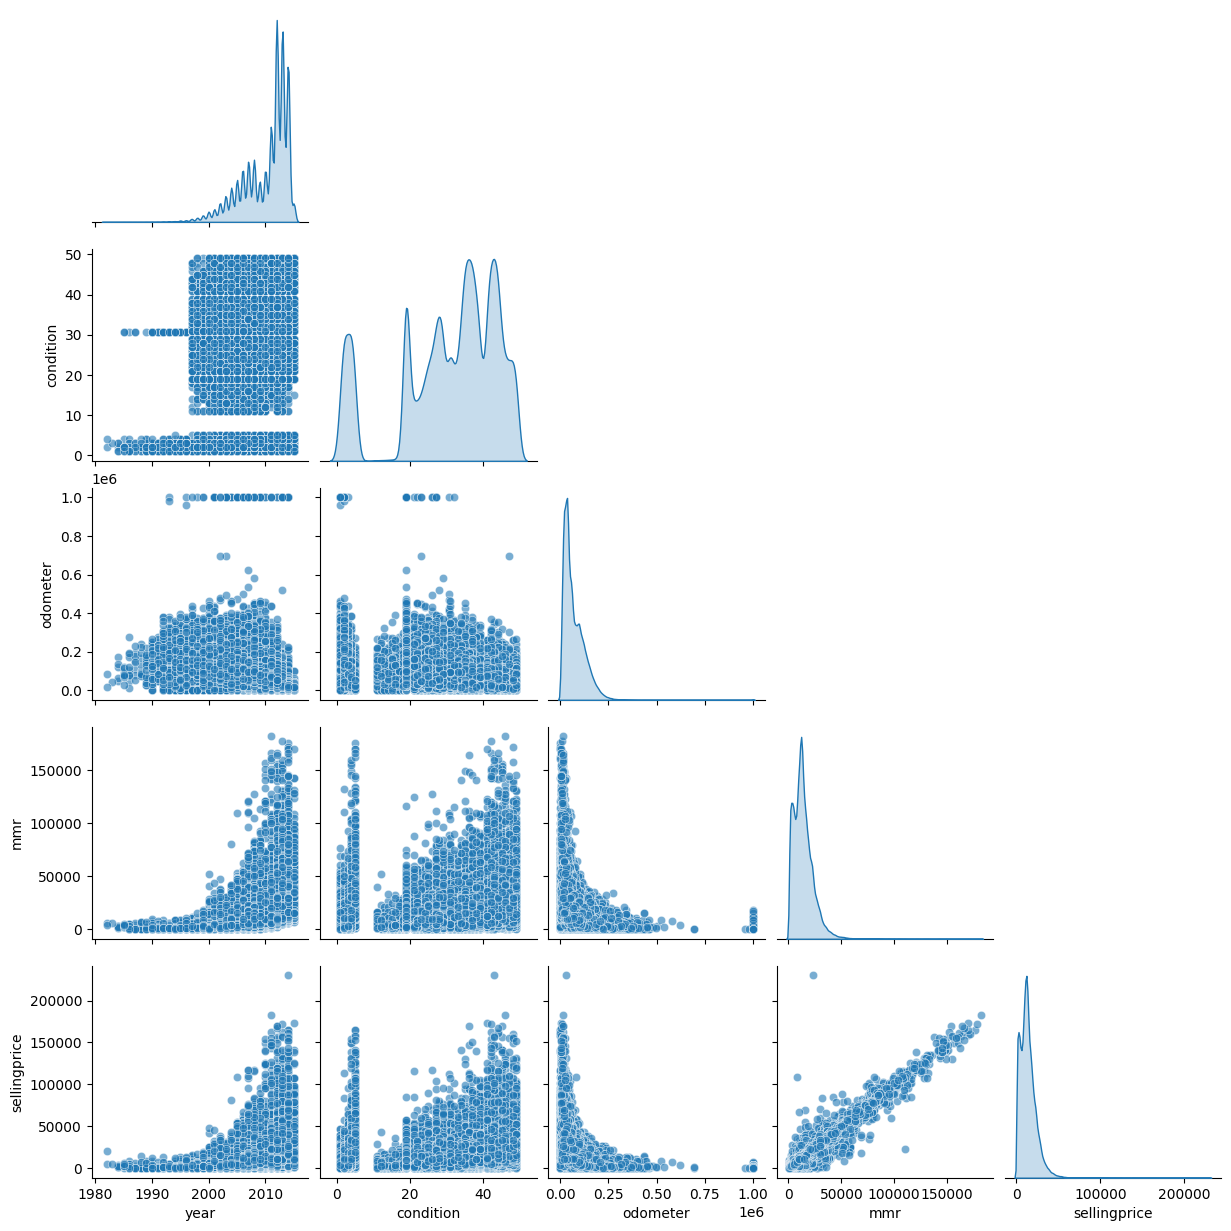

In [ ]:
# Chỉ lấy các biến liên tục từ dataframe
continuous_vars = df[Numeric]

# Vẽ biểu đồ scatter plot giữa các biến liên tục
sns.pairplot(continuous_vars, corner=True, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.show()

Nhận xét:

- Số lượng xe bán ra:
- Số lượng xe bán ra trong năm đầu tiên cao hơn so với các năm sau.
- Số lượng xe bán ra trong năm thứ ba cao hơn so với năm thứ tư.
- Số lượng xe bán ra trong năm thứ năm cao hơn so với năm thứ sáu.
- Số lượng xe bán ra trong năm thứ bảy cao hơn so với năm thứ tám.

Tình trạng xe:
- Xe có tình trạng tốt (điểm cao) thường được bán với giá cao hơn.
- Xe có tình trạng xấu (điểm thấp) thường được bán với giá thấp hơn.

Mối quan hệ:
- Có mối tương quan tích cực giữa số lượng xe bán ra và tình trạng xe.
- Xe có tình trạng tốt hơn có khả năng được bán nhiều hơn.
- Dựa trên những nhận xét trên, có thể đưa ra một số kết luận sau:

> - Thị trường xe cũ có xu hướng ưa chuộng những chiếc xe có tình trạng tốt.
> - Người mua xe có xu hướng sẵn sàng chi trả nhiều tiền hơn cho những chiếc xe có tình trạng tốt.
> -Các nhà bán xe nên chú trọng vào việc duy trì tình trạng tốt cho xe để có thể bán được xe với giá cao hơn.


#### Kiểm định giả thuyết

**Từ những phần trên có một số giả thuyết cần kiểm định như sau:**
> *Xe sản xuất gần đây có giá bán cao hơn so với xe sản xuất cách đây nhiều năm.*

> *Xe có số dặm đi ít hơn (< 99123 dặm) thường có giá bán cao hơn so với xe có số dặm đi nhiều.*

> *Sự thay đổi trong giá cả thị trường Manheim có thể ảnh hưởng đến giá bán của xe.*

**Xe sản xuất gần đây có giá bán cao hơn so với xe sản xuất cách đây nhiều năm.**
> **Đặt giả thuyết:**
> - H0: Không có sự khác biệt hoặc giá bán của xe sản xuất gần đâu không cao hơn xe sản xuất cách đây nhiều năm.
> - H1: Giá bán của xe sản xuất gần đây cao hơn xe sản xuất cách đây nhiều năm.

Dựa vào thời gian bán và năm sản xuất để phân loại xe gần đây (< 3 năm) và ngược lại.

In [ ]:
df_test = df.copy()
df_test['years_difference'] = df_test['saleyear'] - df_test['year']
df_test['recent_car'] = df_test['years_difference'] < 3
print(df_test[['recent_car', 'sellingprice']].head())

   recent_car  sellingprice
2        True       30000.0
3        True       27750.0
4        True       67000.0
6        True       65000.0
7        True        9800.0


In [ ]:
import scipy.stats as stats
recent_cars = df_test[df_test['recent_car']]['sellingprice']
old_cars = df_test[~df_test['recent_car']]['sellingprice']

# Kiểm định t-Student một phía
t_statistic, p_value = stats.ttest_ind(recent_cars, old_cars, alternative='greater')

print("Giá trị thống kê t:", t_statistic)
print("p-value:", p_value)

Giá trị thống kê t: 326.2660138950269
p-value: 0.0


**Kết luận**
> Với p-value = 0, có bằng chứng để bác bỏ giả thuyết H0. Giá bán của xe sản xuất gần đâu cao hơn xe sản xuất cách đây nhiều năm.

**Xe có số dặm đi ít hơn (< 99123 dặm) thường có giá bán cao hơn so với xe có số dặm đi nhiều.**
> **Đặt giả thuyết**
> - H0: Không có sự khác biệt hoặc giá bán của xe có số dặm đi ít hơn không cao hơn giá bán của xe có số dặm đi nhiều"
> - Ha: Giá bán của xe có số dặm đi ít hơn cao hơn so với xe có số dặm đi nhiều

In [ ]:
short_distance_cars = df_test[df_test['odometer'] < 99123]['sellingprice']
long_distance_cars = df_test[df_test['odometer'] >= 99123]['sellingprice']

t_statistic, p_value = stats.ttest_ind(short_distance_cars, long_distance_cars, alternative='greater')

print("Giá trị thống kê t:", t_statistic)
print("p-value:", p_value)

Giá trị thống kê t: 435.4495842172695
p-value: 0.0


**Kết luận**
> Với p-value = 0, Có bằng chứng để bác bỏ giả thuyết H0. Giá bán của xe có số dặm đi ít hơn cao hơn so với xe có số dặm đi nhiều.

**Sự thay đổi trong giá cả thị trường Manheim ảnh hưởng đến giá bán của xe.**

> **Đặt giả thuyết**
> - H0: Không có mối liên hệ tuyến tính giữa giá bán của xe và giá cả thị trường Manheim.
> - Ha: Có mối liên hệ tuyến tính giữa giá bán của xe và giá cả thị trường Manheim.

In [ ]:
import statsmodels.api as sm

X = df_test['mmr']  # Giá cả thị trường Manheim
y = df_test['sellingprice']  # Giá bán của xe

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:           sellingprice   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 1.667e+07
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        03:42:25   Log-Likelihood:            -4.9654e+06
No. Observations:              558598   AIC:                         9.931e+06
Df Residuals:                  558596   BIC:                         9.931e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -30.4598      4.083     -7.460      0.0

**Kết luận**
> - p-value = 0, Có đủ bằng chứng để bá bỏ giả thuyết H0. Sự thay đổi trong giá cả thị trường Manheim ảnh hưởng đến giá bán của xe
> - Kết quả của mô hình hồi quy OLS cho thấy mô hình này phù hợp. Giá trị R bình phương và R bình phương điều chỉnh đều rất cao (0,949), điều này cho thấy rằng tỷ lệ biến động trong giá bán rất cao được giải thích bởi (các) biến độc lập trong mô hình. Thống kê F cũng cao và có ý nghĩa thống kê, điều này cho thấy rằng toàn bộ mô hình là có ý nghĩa.

### Xây dựng mô hình dự đoán

#### Chuẩn hóa tập dữ liệu

In [ ]:
def print_metrics(model,X_train,X_test,y_train,y_test):
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)

    final_mse_train = mean_squared_error(y_train, predictions_train)
    final_mse_test = mean_squared_error(y_test, predictions_test)

    print(f'Final RMSE on the train set: {np.sqrt(final_mse_train)}')
    print(f'Final RMSE on the test set: {np.sqrt(final_mse_test)}')

In [ ]:
data = df.copy()
data.drop(['seller','vin','saledate'],axis=1,inplace=True)
print(data.shape)
data.head()

(558598, 15)


,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice,saleyear,salemonth
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,31900.0,30000.0,2015.0,1.0
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,27500.0,27750.0,2015.0,1.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,66000.0,67000.0,2014.0,12.0
6,2014,BMW,M5,Base,Sedan,automatic,ca,34.0,14943.0,black,black,69000.0,65000.0,2014.0,12.0
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,ca,2.0,28617.0,black,black,11900.0,9800.0,2014.0,12.0


In [ ]:
categorical_cols = ['make', 'model', 'trim', 'body', 'state', 'color', 'interior', 'transmission']
for col in categorical_cols:
    print(f"{col}: {data[col].nunique()}")

make: 96
model: 973
trim: 1962
body: 85
state: 38
color: 20
interior: 18
transmission: 2


> - Vì tập dữ liệu có nhiều cột là biến phân loại, cho nên chúng ta sẽ thực hiện mã hoá nó để phù hợp hơn với thuật toán huấn luyện mô hình
> - Chúng ta sẽ sử dụng one-hot encoding để thực hiện mã hoá các cột này
> - Có 2 cột là model và trim số lượng loại lớn nên không thể dùng one-hot encoding được, thay vào đó sẽ sử dụng hàm băm thông qua phương thức FeatureHasher

In [ ]:
data['cars_age'] = data['year'].apply(lambda x : 2024 - x)

data = pd.get_dummies(data=data,columns=['transmission'],dtype=int, drop_first=True)

encoder = ce.binary.BinaryEncoder(cols=['make','body','interior','color','state'],drop_invariant=True).fit(data)
data = encoder.transform(data)

hasher = FeatureHasher(n_features=40, input_type='string')
hashed_features = hasher.transform(data[['model','trim']].astype(str).to_numpy())
hashed_features_df = pd.DataFrame(hashed_features.toarray())
hashed_features_df.columns = ['hashed_feature_' + str(i) for i in range(hashed_features_df.shape[1])]

data.drop(['year','model', 'trim'],axis=1,inplace=True)
data = pd.concat([data,hashed_features_df],axis=1)
data.dropna(inplace=True)

data.head()

,make_0,make_1,make_2,make_3,make_4,make_5,make_6,body_0,body_1,body_2,...,hashed_feature_30,hashed_feature_31,hashed_feature_32,hashed_feature_33,hashed_feature_34,hashed_feature_35,hashed_feature_36,hashed_feature_37,hashed_feature_38,hashed_feature_39
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0


In [ ]:
X = data.drop('sellingprice',axis=1)
y = data['sellingprice']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 1)

#### Hồi quy tuyến tính
Sử dụng nhóm mô hình hồi quy tuyến tính để xây dựng các mô hình tương ứng
- `LinearRegression` là mô hình hồi quy tuyến tính cơ bản, nó cố gắng tìm ra một đường thẳng (hoặc mặt phẳng/hyperplane trong không gian nhiều chiều) phù hợp nhất với dữ liệu.
- `Ridge` là một biến thể của hồi quy tuyến tính, nó thêm vào một thành phần điều chuẩn (regularization) L2 để tránh overfitting.
- `Lasso` cũng là một biến thể của hồi quy tuyến tính, nhưng nó sử dụng thành phần điều chuẩn L1. Điều này có thể dẫn đến một số hệ số hồi quy bằng không, giúp thực hiện chọn đặc trưng (feature selection).
- `ElasticNet` kết hợp cả hai loại điều chuẩn L1 và L2, cung cấp sự linh hoạt hơn trong việc điều chỉnh mô hình.

In [ ]:
X = data.drop('sellingprice',axis=1)
y = data['sellingprice']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 1)

# Huấn luyện các mô hình
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()
elasticnet_model = ElasticNet()

linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
elasticnet_model.fit(X_train, y_train)

# Đánh giá mô hình trên tập kiểm tra
linear_pred = linear_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)
elasticnet_pred = elasticnet_model.predict(X_test)

linear_mse = mean_squared_error(y_test, linear_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
elasticnet_mse = mean_squared_error(y_test, elasticnet_pred)

linear_rmse = np.sqrt(linear_mse)
ridge_rmse = np.sqrt(ridge_mse)
lasso_rmse = np.sqrt(lasso_mse)
elasticnet_rmse = np.sqrt(elasticnet_mse)

linear_r2 = r2_score(y_test, linear_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
elasticnet_r2 = r2_score(y_test, elasticnet_pred)

# In kết quả
print("Linear Regression:")
print("RMSE:", linear_rmse)
print("R-squared:", linear_r2)
print_metrics(linear_model,X_train,X_test,y_train,y_test)

print('=='*60)

print("Ridge Regression:")
print("RMSE:", ridge_rmse)
print("R-squared:", ridge_r2)
print_metrics(ridge_model,X_train,X_test,y_train,y_test)

print('=='*60)

print("Lasso Regression:")
print("RMSE:", lasso_rmse)
print("R-squared:", lasso_r2)
print_metrics(lasso_model,X_train,X_test,y_train,y_test)

print('=='*60)

print("ElasticNet Regression:")
print("RMSE:", elasticnet_rmse)
print("R-squared:", elasticnet_r2)
print_metrics(elasticnet_model,X_train,X_test,y_train,y_test)

Linear Regression:
RMSE: 1666.1368192845944
R-squared: 0.9709244217982321
Final RMSE on the train set: 1690.2623016114853
Final RMSE on the test set: 1666.1368192845944
Ridge Regression:
RMSE: 1666.1367946985038
R-squared: 0.9709244226563307
Final RMSE on the train set: 1690.2623017027913
Final RMSE on the test set: 1666.1367946985038
Lasso Regression:
RMSE: 1666.2867884170666
R-squared: 0.9709191873715868
Final RMSE on the train set: 1690.6167991663617
Final RMSE on the test set: 1666.2867884170666
ElasticNet Regression:
RMSE: 1668.6723336835419
R-squared: 0.9708358604738792
Final RMSE on the train set: 1693.213571379022
Final RMSE on the test set: 1668.6723336835419


Tất cả bốn mô hình đều hoạt động tốt, với R-squared gần 1 và RMSE tương đối thấp. Điều này cho thấy mô hình đã khá tốt trong việc dự đoán giá bán xe.

Tuy nhiên, giữa các mô hình có một số khác biệt nhỏ:

> - Mô hình hồi quy tuyến tính (Linear Regression) và hồi quy Ridge (Ridge Regression) có hiệu suất tương tự nhau, với R-squared và RMSE gần như giống hệt. Điều này có thể cho thấy rằng dữ liệu không có nhiều đặc trưng dư thừa, vì hồi quy Ridge thường hoạt động tốt hơn khi có sự đa cộng tuyến giữa các đặc trưng.

> - Hồi quy Lasso (Lasso Regression) có hiệu suất tương tự như hai mô hình trên, nhưng RMSE hơi cao hơn một chút. Điều này có thể do Lasso đã đặt một số hệ số hồi quy về 0, loại bỏ một số đặc trưng khỏi mô hình.

> - Hồi quy ElasticNet (ElasticNet Regression) có R-squared thấp hơn và RMSE cao hơn so với ba mô hình khác. Điều này có thể do ElasticNet đã điều chỉnh mô hình một cách quá mạnh, dẫn đến mô hình không còn phù hợp với dữ liệu tốt như trước.

#### Decission Trees

In [ ]:
model = DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=10, ccp_alpha=0.01, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
dt_mse = mean_squared_error(y_test, y_pred)
dt_rmse = np.sqrt(dt_mse)
r2 = r2_score(y_test, y_pred)
print("Decision Tree Regression:")
print("RMSE:", dt_rmse)
print("R-squared:", r2)
print_metrics(model,X_train,X_test,y_train,y_test)

Decision Tree Regression:
RMSE: 1571.4611457351614
R-squared: 0.9741348898926867
Final RMSE on the train set: 1547.1123248848578
Final RMSE on the test set: 1571.4611457351614


R-squared của mô hình là 0.974, cho thấy mô hình giải thích được khoảng 97.41% sự biến đổi của giá xe, đây là một chỉ số rất cao, cho thấy mô hình có độ chính xác cao.

RMSE (Root Mean Square Error) trên tập huấn luyện và tập kiểm tra  là 1547.11 và 1571.46 tương ứng. RMSE càng thấp, mô hình càng tốt. Trong trường hợp này, RMSE trên tập huấn luyện và tập kiểm tra đã giảm so với trước khi điều chỉnh tham số, cho thấy mô hình đã cải thiện.

Đặc biệt, sự chênh lệch giữa RMSE trên tập huấn luyện và tập kiểm tra đã giảm, cho thấy mô hình đã giảm overfitting.

#### Random Forest

In [ ]:
model = RandomForestRegressor(n_estimators=100,
                              random_state=42,
                              max_depth=12,
                              max_features=0.5,
                              min_samples_split=10,
                              min_samples_leaf=5,
                              bootstrap=True,
                              max_samples=0.7,
                              ccp_alpha=0.01,
                              n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)
r2 = r2_score(y_test, y_pred)
print("Random Forest Regression:")
print("RMSE:", rf_rmse)
print("R-squared:", r2)
print_metrics(model,X_train,X_test,y_train,y_test)

Random Forest Regression:
RMSE: 1552.0940312574187
R-squared: 0.9747684986017633
Final RMSE on the train set: 1487.6727527321355
Final RMSE on the test set: 1552.0940312574185


R-squared của mô hình là 0.9747, cho thấy mô hình giải thích được khoảng 97.48% sự biến đổi của giá xe, đây là một chỉ số rất cao, cho thấy mô hình có độ chính xác cao.

RMSE (Root Mean Square Error) trên tập huấn luyện và tập kiểm tra  là 1487.67 và 1552.09 tương ứng. RMSE càng thấp, mô hình càng tốt. Trong trường hợp này, RMSE trên tập huấn luyện và tập kiểm tra đã giảm so với trước khi điều chỉnh tham số, cho thấy mô hình đã cải thiện.

Đặc biệt, sự chênh lệch giữa RMSE trên tập huấn luyện và tập kiểm tra đã giảm, cho thấy mô hình đã giảm overfitting.

Tổng quát, mô hình sau khi điều chỉnh tham số đã hoạt động tốt hơn trong việc dự đoán giá bán xe ô tô, với độ chính xác cao và overfitting thấp hơn.

Mô hình Random Forest Regression thường cho kết quả tốt hơn so với Decision Tree Regression do nó kết hợp nhiều cây quyết định, giúp giảm variance và overfitting. Trong trường hợp , mô hình Random Forest Regression đã cho kết quả tốt hơn so với mô hình Decision Tree Regression ban đầu.

#### Gradient Boosting

Sau khi ta đã thử nghiệm một số single model, nhận thấy rằng một số mô hình có thể gặp phải vấn đề về Bias-Variance Tradeoff, tức là một số mô hình có thể có độ chệch cao (bias) hoặc phương sai cao (variance). Để giải quyết các khuyết điểm này, ta sẽ thử nghiệm với mô hình Gradient Boosting. Gradient Boosting là một phương pháp mạnh mẽ trong machine learning, có khả năng giảm được cả bias và variance trong một mô hình dự đoán. Phương pháp này kết hợp nhiều cây quyết định yếu thành một mô hình mạnh, bằng cách xây dựng các cây mới để sửa lỗi của các cây trước đó.

In [ ]:
model = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
gb_mse = mean_squared_error(y_test, y_pred)
gb_rmse = np.sqrt(gb_mse)
r2 = r2_score(y_test, y_pred)
print("Gradient Boosting:")
print("RMSE:", gb_rmse)
print("R-squared:", r2)
print_metrics(model,X_train,X_test,y_train,y_test)

Gradient Boosting:
RMSE: 1573.5041218574124
R-squared: 0.9740675943684517
Final RMSE on the train set: 1589.00388074822
Final RMSE on the test set: 1573.5041218574124


Ta có thể thấy giá trị RMSE khá thấp, chỉ khoảng 1573.50. Điều này cho thấy mô hình có khả năng dự đoán giá xe với độ chính xác cao trên tập kiểm tra.
Giá trị của R-squared gần 1 (0.9741 trong trường hợp này) cho thấy mô hình giải thích được hầu hết sự biến động của dữ liệu.

Sự khác biệt giữa RMSE trên tập huấn luyện và tập kiểm tra không lớn, cho thấy không có hiện tượng quá mức (overfitting) trong mô hình. Mô hình đạt được hiệu suất dự đoán ổn định trên cả hai tập dữ liệu.

Tóm lại, mô hình Gradient Boosting đã cho kết quả dự đoán khá chính xác và ổn định trên cả tập huấn luyện và tập kiểm tra. Điều này cho thấy mô hình có khả năng dự đoán giá xe một cách hiệu quả và có thể được sử dụng trong các ứng dụng thực tế giải quyết được vấn đề Bias-Variance Tradeoff của các single model khác.

#### XGBoost

XGBoost là một mô hình dựa trên Gradient Boosting nhưng được cải tiến để cung cấp hiệu suất và tốc độ tính toán tốt hơn. Đặc biệt, XGBoost sử dụng nhiều kỹ thuật mới cũng như hoạt động tốt với Flink, Spark và các hệ sinh thái khác. Chính vì vậy ta cũng sẽ thử nghiệm xây dựng mô hình XGBoost và so sánh

In [ ]:
X = data.drop('sellingprice',axis=1)
y = data['sellingprice']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 1)

model = xgb.XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.5,
    learning_rate=0.05,
    max_depth=8,
    reg_alpha=1,
    reg_lambda=1,
    n_estimators=100,
    min_child_weight=3
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_rmse = np.sqrt(xgb_mse)
r2 = r2_score(y_test, y_pred)
print("XGBoost:")
print("RMSE:", xgb_rmse)
print("R-squared:", r2)
print_metrics(model,X_train,X_test,y_train,y_test)

XGBoost:
RMSE: 2010.1603444471323
R-squared: 0.9576777801678968
Final RMSE on the train set: 1935.5826112822592
Final RMSE on the test set: 2010.1603444471323


Ta có thể thấy giá trị RMSE cũng khá thấp nhưng cao hơn so với Gradient Boosting, cụ thể là 2010.160. Điều này cho thấy mô hình có khả năng dự đoán giá xe với độ chính xác cao trên tập kiểm tra. Giá trị của R-squared là 0.95 là một mức cao nhưng về hiệu suất thì lại không bằng Gradient Boosting.

Sự khác biệt giữa RMSE trên tập huấn luyện và tập kiểm tra không lớn, cho thấy không có hiện tượng quá mức (overfitting) trong mô hình.

Tóm lại, mô hình XGBoost cũng cho kết quả dự đoán khá ổn định trên cả tập huấn luyện và tập kiểm tra, nhưng hiệu suất của nó không cao như mô hình Gradient Boosting. Điều này cho thấy cần tiếp tục tinh chỉnh và cải thiện mô hình để đạt được kết quả tốt hơn.

#### Neural Networks

Sau khi đã khám phá và thử nghiệm nhiều phương pháp machine learning từ các mô hình đơn giản đến các mô hình cải tiến như Gradient Boosting và XGBoost, ta có thể nhận thấy rằng mỗi phương pháp đều có ưu điểm và hạn chế riêng.

Trong nhiều trường hợp, Neural Networks - Deep Learning có thể là một lựa chọn hấp dẫn để khám phá tiềm năng của dữ liệu. Sự linh hoạt và khả năng học đa lớp của neural networks giúp chúng có thể học được các đặc trưng phức tạp và tạo ra các mô hình dự đoán mạnh mẽ. Ta sẽ thử nghiệm xây dựng một mô hình dự đoán giá nhà bằng Neural Networks

In [ ]:
# Chuẩn hóa standardScaler để mô hình Neural Networks hoạt động hiệu quả
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    keras.Input(shape=(77,)),
    layers.Dense(120, activation='relu'),
    layers.Dense(80, activation='relu'),
    layers.Dense(60, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1),
])


model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
11168/11168 [==============================] - 38s 3ms/step - loss: 8586807.0000 - val_loss: 2841343.7500
Epoch 2/10
11168/11168 [==============================] - 29s 3ms/step - loss: 2981654.0000 - val_loss: 2766566.5000
Epoch 3/10
11168/11168 [==============================] - 31s 3ms/step - loss: 2881200.5000 - val_loss: 2661467.0000
Epoch 4/10
11168/11168 [==============================] - 30s 3ms/step - loss: 2840850.2500 - val_loss: 2616297.5000
Epoch 5/10
11168/11168 [==============================] - 30s 3ms/step - loss: 2801982.5000 - val_loss: 2605791.5000
Epoch 6/10
11168/11168 [==============================] - 29s 3ms/step - loss: 2775498.7500 - val_loss: 2620667.2500
Epoch 7/10
11168/11168 [==============================] - 29s 3ms/step - loss: 2751382.7500 - val_loss: 2574363.7500
Epoch 8/10
11168/11168 [==============================] - 31s 3ms/step - loss: 2728726.5000 - val_loss: 2582456.0000
Epoch 9/10
11168/11168 [==============================] - 28s 3m

In [ ]:
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

3490/3490 [==============================] - 6s 2ms/step - loss: 2585185.2500
Test Loss: 2585185.25


In [ ]:
y_pred = model.predict(X_test)
nn_mse = mean_squared_error(y_test, y_pred)
nn_rmse = np.sqrt(nn_mse)
r2 = r2_score(y_test, y_pred)
print("Neural Networks:")
print("RMSE:", nn_rmse)
print("R-squared:", r2)
print_metrics(model,X_train,X_test,y_train,y_test)

3490/3490 [==============================] - 5s 1ms/step
Neural Networks:
RMSE: 1607.8521076898082
R-squared: 0.9729230816767024
3490/3490 [==============================] - 7s 2ms/step
Final RMSE on the train set: 1614.8860634033713
Final RMSE on the test set: 1607.8521076898082


Kết quả cho ra RMSE khoảng 1607.85. Điều này cho thấy mô hình dự đoán giá xe với mức độ sai lệch trung bình là khoảng 1607.85 - là con số cao nhất trong tất cả model.

R-squared khoảng 0.9729 trên tập kiểm tra. R-squared đo lường mức độ biến thể của biến phụ thuộc được giải thích bởi mô hình. Một giá trị cao gần 1 cho thấy mô hình giải thích được một phần lớn sự biến động của dữ liệu.

So sánh RMSE trên tập huấn luyện và tập kiểm tra: Giá trị RMSE cuối cùng trên cả tập huấn luyện và tập kiểm tra không khác biệt nhiều, chỉ khoảng 7 đơn vị. Điều này cho thấy mô hình không gặp phải hiện tượng quá mức (overfitting) giải quyết được vấn đề Bias-Variance Tradeoff rất tốt do mô hình tinh chỉnh phức tạp dù RMSE có hơi cao không đáng kể so với các mô hình đơn giản hơn. Mô hình có khả năng dự đoán ổn định trên cả tập huấn luyện và tập kiểm tra.

Như vậy, mô hình Neural Networks đã cho kết quả dự đoán khá chính xác và ổn định trên cả tập huấn luyện và tập kiểm tra. So với các single model và mô hình Gradient Boosting, mô hình Neural Networks tuy có giá trị RMSE cao hơn nhưng bù lại sự khác biệt giữa khi thử nghiệm trên tập test và train, cho thấy khả năng dự đoán và giải thích dữ liệu của nó trên các tập khác sẽ tốt hơn.

### Kết luận cho mô hình dự đoán

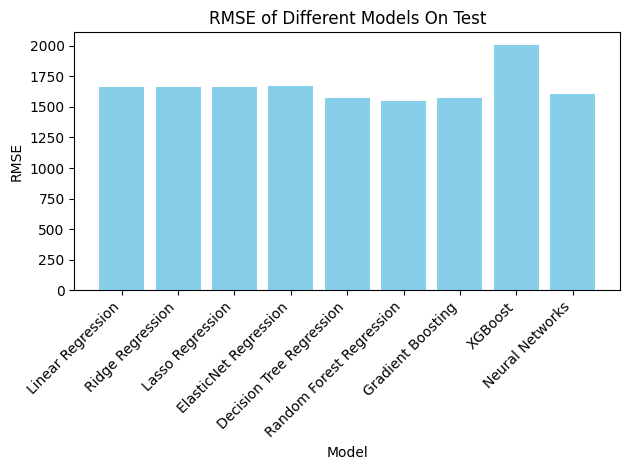

In [ ]:
df_rmse = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Gradient Boosting','XGBoost', 'Neural Networks'],
    'RMSE': [linear_rmse, ridge_rmse, lasso_rmse, elasticnet_rmse, dt_rmse, rf_rmse, gb_rmse, xgb_rmse, nn_rmse]
})

plt.bar(df_rmse['Model'], df_rmse['RMSE'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE of Different Models On Test')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Sau khi đã thử nghiệm các mô hình từ đơn giản như các mô hình Machine Learning bình thường dến phức tạp hơn như Boosting và Deep Learing, ta rút ra được những ưu điểm đặc điểm của từng loại mô hình và có thể áp dụng để tiến hành dự đoán giá xe.
- Với Random Forest Regression (RMSE: 1552.09) thì đây là mô hình có độ chính xác cao nhất có vẻ như là hợp lí nhất nhưng những vấn đề cơ bản nhất cua single model cơ bản là vấn đề bias và variance đối nghịch nhau cho nên rất có thể mô hình sẽ bị overfit khá cao.
- Với Gradient Boosting và XGBoost sẽ có RMSE cao hơn nhưng vói bản chất boosting thì sẽ giải quyết được overfitting bias và variance ngược nhau.
- Với Neural Networks thì sẽ phức tạp hơn và giải quyết được vấn đề overfitting hơn, tinh chỉnh và hiểu được bản chất của tập dữ liệu áp dụng được tốt cho các dữ liệu khác.